In [138]:
import psycopg2
import pandas as pd
from sklearn.cross_validation import train_test_split

def load_labels():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Labels
    cursor.execute("select * from labels_water_pumps;")
    list_labels = cursor.fetchall()
   
    labels_id =[]
    labels_class =[]
    for each in list_labels:
        labels_id.append(each[0])
        labels_class.append(each[1])
        
    series_labels = pd.DataFrame(labels_class, index=labels_id)

    return series_labels

df_labels = load_labels()

df_labels.columns = ['label']
print df_labels.head()
print df_labels.tail()

                label
69572      functional
8776       functional
34310      functional
67743  non functional
19728      functional
            label
60739  functional
27263  functional
37057  functional
31282  functional
26348  functional


In [139]:
def load_wells():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Pump Data
    cursor.execute("select * from water_pumps;")
    list_pumps = cursor.fetchall()

    list_pumps_id = []
    list_pumps_fields = []
    for each in list_pumps:
        list_pumps_id.append(each[0])
        list_pumps_fields.append(each)

    #Converting wells data into a pandas Data Frame
    df_pumps = pd.DataFrame(list_pumps_fields, index=list_pumps_id)

    return df_pumps

df_data = load_wells()

print df_data.head()
print df_data.tail()

          0     1           2             3     4             5          6   \
69572  69572  6000  2011-03-14         Roman  1390         Roman  34.938093   
8776    8776     0  2013-03-06       Grumeti  1399       GRUMETI  34.698766   
34310  34310    25  2013-02-25  Lottery Club   686  World vision  37.460664   
67743  67743     0  2013-01-28        Unicef   263        UNICEF  38.486161   
19728  19728     0  2011-07-13   Action In A     0       Artisan  31.130847   

              7                     8  9          ...                  30  \
69572  -9.856322                  none  0         ...            annually   
8776   -2.147466              Zahanati  0         ...           never pay   
34310  -3.821329           Kwa Mahundi  0         ...          per bucket   
67743 -11.155298  Zahanati Ya Nanyumbu  0         ...           never pay   
19728  -1.825359               Shuleni  0         ...           never pay   

         31    32            33            34                 

In [140]:
df_data.columns = ['id','amount_tsh',
                    'date_recorded',
                    'funder',
                    'gps_height',
                    'installer',
                    'longitude',
                    'latitude',
                    'wpt_name',
                    'num_private',
                    'basin',
                    'subvillage',
                    'region',
                    'region_code',
                    'district_code',
                    'lga',
                    'ward',
                    'population',
                    'public_meeting',
                    'recorded_by',
                    'scheme_management',
                    'scheme_name',
                    'permit',
                    'construction_year',
                    'extraction_type',
                    'extraction_type_group',
                    'extraction_type_class',
                    'management',
                    'management_group',
                    'payment',
                    'payment_type',
                    'water_quality',
                    'quality_group',
                    'quantity',
                    'quantity_group',
                    'source',
                    'source_type',
                    'source_class',
                    'waterpoint_type',
                    'waterpoint_type_group']

print df_data.head()
print df_data.tail()

          id  amount_tsh date_recorded        funder  gps_height  \
69572  69572        6000    2011-03-14         Roman        1390   
8776    8776           0    2013-03-06       Grumeti        1399   
34310  34310          25    2013-02-25  Lottery Club         686   
67743  67743           0    2013-01-28        Unicef         263   
19728  19728           0    2011-07-13   Action In A           0   

          installer  longitude   latitude              wpt_name num_private  \
69572         Roman  34.938093  -9.856322                  none           0   
8776        GRUMETI  34.698766  -2.147466              Zahanati           0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi           0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
19728       Artisan  31.130847  -1.825359               Shuleni           0   

               ...          payment_type water_quality quality_group  \
69572          ...              annually    

In [141]:
print df_data.head()
print df_labels.head()
print df_data.tail()
print df_labels.tail()

          id  amount_tsh date_recorded        funder  gps_height  \
69572  69572        6000    2011-03-14         Roman        1390   
8776    8776           0    2013-03-06       Grumeti        1399   
34310  34310          25    2013-02-25  Lottery Club         686   
67743  67743           0    2013-01-28        Unicef         263   
19728  19728           0    2011-07-13   Action In A           0   

          installer  longitude   latitude              wpt_name num_private  \
69572         Roman  34.938093  -9.856322                  none           0   
8776        GRUMETI  34.698766  -2.147466              Zahanati           0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi           0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
19728       Artisan  31.130847  -1.825359               Shuleni           0   

               ...          payment_type water_quality quality_group  \
69572          ...              annually    

In [142]:
print df_data.head()
print df_labels.head()
print df_data.tail()
print df_labels.tail()
print df_data.shape
print df_labels.shape

df_complete = pd.concat([df_data,df_labels],axis=1)

print df_complete.shape
print df_complete.columns.values



          id  amount_tsh date_recorded        funder  gps_height  \
69572  69572        6000    2011-03-14         Roman        1390   
8776    8776           0    2013-03-06       Grumeti        1399   
34310  34310          25    2013-02-25  Lottery Club         686   
67743  67743           0    2013-01-28        Unicef         263   
19728  19728           0    2011-07-13   Action In A           0   

          installer  longitude   latitude              wpt_name num_private  \
69572         Roman  34.938093  -9.856322                  none           0   
8776        GRUMETI  34.698766  -2.147466              Zahanati           0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi           0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
19728       Artisan  31.130847  -1.825359               Shuleni           0   

               ...          payment_type water_quality quality_group  \
69572          ...              annually    

In [143]:
df_complete.to_csv('/Users/martinrasumoff/map.csv', sep=',', index=False)

In [144]:
df_data_basin = pd.get_dummies(df_data['basin'])
print 'basin:',df_data_basin.shape
df_data_public_meeting = pd.get_dummies(df_data['public_meeting'])
print 'Public Meeting:',df_data_public_meeting.shape
df_data_scheme_mgmnt = pd.get_dummies(df_data['scheme_management'])
print 'Scheme Management:',df_data_scheme_mgmnt.shape
df_data_permit = pd.get_dummies(df_data['permit'])
print 'permit:',df_data_permit.shape
df_data_extraction_type_group = pd.get_dummies(df_data['extraction_type_group'])
print 'Data Extraction:',df_data_extraction_type_group.shape
df_data_extraction_type_class = pd.get_dummies(df_data['extraction_type_class'])
print 'Data Extr Type:',df_data_extraction_type_class.shape
df_data_management_group = pd.get_dummies(df_data['management_group'])
print 'Management Group:',df_data_management_group.shape
df_data_payment_type = pd.get_dummies(df_data['payment_type'])
print 'Payment Type:',df_data_payment_type.shape
df_data_quality_group = pd.get_dummies(df_data['quality_group'])
print 'Quality Group:',df_data_quality_group.shape
df_data_quantity_group = pd.get_dummies(df_data['quantity_group'])
print 'Quantity Group:',df_data_quantity_group.shape
df_data_source_type = pd.get_dummies(df_data['source_type'])
print 'Source Type:',df_data_source_type.shape
df_data_source_class = pd.get_dummies(df_data['source_class'])
print 'Source Class:',df_data_source_class.shape
df_data_waterpoint_type_group = pd.get_dummies(df_data['waterpoint_type_group'])
print 'Waterpoint Type:',df_data_waterpoint_type_group.shape

basin: (59400, 9)
Public Meeting: (59400, 2)
Scheme Management: (59400, 12)
permit: (59400, 2)
Data Extraction: (59400, 13)
Data Extr Type: (59400, 7)
Management Group: (59400, 5)
Payment Type: (59400, 7)
Quality Group: (59400, 6)
Quantity Group: (59400, 5)
Source Type: (59400, 7)
Source Class: (59400, 3)
Waterpoint Type: (59400, 6)


In [145]:
df_data = df_data[['amount_tsh','gps_height','longitude','latitude','region_code','district_code',\
                   'population']]

df_coded = pd.concat([df_data,df_data_basin,df_data_public_meeting,df_data_scheme_mgmnt,df_data_permit,\
                      df_data_extraction_type_group,df_data_extraction_type_class,df_data_management_group,\
                      df_data_payment_type,df_data_quality_group,df_data_quantity_group,\
                      df_data_source_type,df_data_source_class,df_data_waterpoint_type_group],axis=1)

print df_data.shape
print df_coded.shape


(59400, 7)
(59400, 91)


In [146]:
df_coded.sort_index(inplace=True)
df_labels.sort_index(inplace=True)

print (df_labels.index == df_coded.index).sum()
print df_coded.shape

print len(df_labels)
print len(df_coded)

59400
(59400, 91)
59400
59400


In [147]:
print df_coded.tail()
print df_labels.tail()

       amount_tsh  gps_height  longitude   latitude  region_code  \
74240           0        1183  37.007726  -3.280868            2   
74242           0           0  33.724987  -8.940758           12   
74243           0        1188  33.963539  -1.429477           20   
74246          50        1428  35.630481  -7.710549           11   
74247          50         965  35.432998 -10.639270           10   

       district_code  population  Internal  Lake Nyasa  Lake Rukwa  ...    \
74240              7         350         0           0           0  ...     
74242              2           0         0           0           0  ...     
74243              6          95         0           0           0  ...     
74246              1           1         0           0           0  ...     
74247              2         900         0           0           0  ...     

       spring  groundwater  surface  unknown  cattle trough  \
74240       0            0        1        0              0   
74

In [148]:
print (df_labels.index == df_coded.index).sum()
print df_coded.shape



59400
(59400, 91)


In [149]:
print df_coded.head()
print df_labels.head()

   amount_tsh  gps_height  longitude  latitude  region_code  district_code  \
0           0           0  33.125828 -5.118154           14              3   
1           0        1978  34.770717 -9.395642           11              4   
2           0           0  36.115056 -6.279268            1              4   
3          10        1639  37.147432 -3.187555            3              5   
4           0           0  36.164893 -6.099289            1              4   

   population  Internal  Lake Nyasa  Lake Rukwa  ...    spring  groundwater  \
0           0         0           0           0  ...         0            1   
1          20         0           0           0  ...         0            1   
2           0         0           0           0  ...         0            1   
3          25         0           0           0  ...         1            1   
4           0         0           0           0  ...         0            1   

   surface  unknown  cattle trough  communal standpipe  

In [150]:
%matplotlib inline

In [151]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

print df_coded.shape
X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_coded, df_labels, test_size=0.25, random_state=43)

X = X_pumps_train
y = y_pumps_train[['label']]

print X.shape
print y.shape

print X.head()
print y.head()



(59400, 91)
(44550, 91)
(44550, 1)
       amount_tsh  gps_height  longitude   latitude  region_code  \
37900           0           0  33.104711  -4.053327           14   
40527           0           0  32.569985  -8.954532           12   
26058           0        1804  31.736616  -8.439998           15   
6969          500        1821  34.774402  -9.123071           11   
41018         500         767  36.092962 -10.923966           10   

       district_code  population  Internal  Lake Nyasa  Lake Rukwa  ...    \
37900              1           0         1           0           0  ...     
40527              6           0         0           0           1  ...     
26058              2         200         0           0           1  ...     
6969               4         108         0           0           0  ...     
41018              5         400         0           0           0  ...     

       spring  groundwater  surface  unknown  cattle trough  \
37900       0            1    

In [ ]:
'''max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:
If int, then consider max_features features at each split.
If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.
Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features. Note: this parameter is tree-specific.
max_depth : integer or None, optional (default=None)
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Ignored if max_leaf_nodes is not None. Note: this parameter is tree-specific.
min_samples_split : integer, optional (default=2)
The minimum number of samples required to split an internal node. Note: this parameter is tree-specific.
min_samples_leaf : integer, optional (default=1)
The minimum number of samples in newly created leaves. A split is discarded if after the split, one of the leaves would contain less then min_samples_leaf samples. Note: this parameter is tree-specific.
min_weight_fraction_leaf : float, optional (default=0.)
The minimum weighted fraction of the input samples required to be at a leaf node. Note: this parameter is tree-specific.
max_leaf_nodes : int or None, optional (default=None)
Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes. If not None then max_depth will be ignored. Note: this parameter is tree-specific.
'''

In [152]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

'''
n_estimators increase start with 20, default is 10

'''

l_labels = ['functional','non functional','functional needs repair']
num_estimators = [17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
num_depths = [20,24,28,32,36,40,44,48,52,56,60]
train_res = []
test_res = []
acc_score = []
prec_score = []
reca_score = []
fll_score = []
rec_fl_score = []
conf_matrix = []

df_accuracy = pd.DataFrame(acc_score,index=num_estimators,columns=num_depths)
df_precision = pd.DataFrame(prec_score,index=num_estimators,columns=num_depths)
df_recall = pd.DataFrame(reca_score,index=num_estimators,columns=num_depths)
df_fl = pd.DataFrame(f1_score,index=num_estimators,columns=num_depths)
df_cm = pd.DataFrame(conf_matrix,index=num_estimators,columns=num_depths)

for estim in num_estimators:
    
    for depths in num_depths:

        X = X_pumps_train
        y = y_pumps_train[['label']]

        clf = ExtraTreesClassifier(n_estimators=estim,max_depth=depths,max_features='log2')
        
        X_new_t = clf.fit_transform(X, y)

        result_train = clf.score(X,y)
        result_test = clf.score(X_pumps_test,y_pumps_test)

        result_pred = clf.predict(X_pumps_test)

        acc_1 = accuracy_score(y_pumps_test, result_pred)
        clf_precision, clf_recall, clf_f1, _ = precision_recall_fscore_support(y_pumps_test,result_pred, \
                                                                               pos_label=None,\
                                                                               average=None)
        #sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None)[source]
        c_matrix = confusion_matrix(y_pumps_test, result_pred, labels=l_labels)
        
        print "+++++++++++++++++++"
        print "Classes :", clf.classes_
        print "Number of Estimators: ",estim
        print "Max_depth: ", depths
        print "+++++++++++++++++++"
#        print "Train Score:",result_train
#        print "Test Score:",result_test
        print "Accuracy Score: ",acc_1
        print "Precision Score:",clf_precision
        print "Recall Score:",clf_recall
        print "Confusion Matrix:",c_matrix
        print "------------------"

        df_accuracy.ix[estim,depths] = acc_1
        df_precision.ix[estim,depths] = clf_precision
        df_recall.ix[estim,depths] = clf_recall
#        df_fl.ix[estim,depths] = clf_f1
        df_cm.ix[estim,depths] = c_matrix
           
            
'''
accuracy = (true positives + true negatives)/all
recall = tp/(tp+fn)
sklearn.metrics.confusion_matrix
'''


//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)


+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  17
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.777037037037
Precision Score: [ 0.75127214  0.60997067  0.84326287]
Recall Score: [ 0.91384006  0.18960802  0.69585903]
Confusion Matrix: [[7382  598   98]
 [1691 3949   35]
 [ 753  136  208]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  17
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.789158249158
Precision Score: [ 0.77941018  0.57029703  0.82861635]
Recall Score: [ 0.89316663  0.26253418  0.74290749]
Confusion Matrix: [[7215  713  150]
 [1392 4216   67]
 [ 650  159  288]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  17
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.78734006734
Precision Score: [ 0.79031716  0.50748503  0.81783609]
Recall Score: [ 0.87298836  0.30902461  0.75788546]
Confusion Matrix: [[7052  803  223]
 [1268 4301  106]
 [ 603  155  339]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  17
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.785387205387
Precision Score: [ 0.79595567  0.49054054  0.80884824]
Recall Score: [ 0.86246596  0.33090246  0.76352423]
Confusion Matrix: [[6967  862  249]
 [1214 4333  128]
 [ 572  162  363]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  17
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.780942760943
Precision Score: [ 0.79802211  0.46182728  0.80076979]
Recall Score: [ 0.84909631  0.33637192  0.76986784]
Confusion Matrix: [[6859  925  294]
 [1170 4369  136]
 [ 566  162  369]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  17
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.78228956229
Precision Score: [ 0.79747276  0.465       0.804941  ]
Recall Score: [ 0.85157217  0.33910665  0.76933921]
Confusion Matrix: [[6879  910  289]
 [1170 4366  139]
 [ 577  148  372]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  17
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.782962962963
Precision Score: [ 0.80184493  0.45652174  0.80285819]
Recall Score: [ 0.85008666  0.34457612  0.77215859]
Confusion Matrix: [[6867  906  305]
 [1148 4382  145]
 [ 549  170  378]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  17
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.778518518519
Precision Score: [ 0.79696616  0.44566545  0.79948727]
Recall Score: [ 0.84550631  0.33272562  0.76933921]
Confusion Matrix: [[6830  937  311]
 [1166 4366  143]
 [ 574  158  365]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  17
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.779797979798
Precision Score: [ 0.79978876  0.45006017  0.79865406]
Recall Score: [ 0.84364942  0.34092981  0.77374449]
Confusion Matrix: [[6815  954  309]
 [1136 4391  148]
 [ 570  153  374]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  17
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.779461279461
Precision Score: [ 0.80021117  0.45292014  0.79715692]
Recall Score: [ 0.84439218  0.34639927  0.7707489 ]
Confusion Matrix: [[6821  944  313]
 [1155 4374  146]
 [ 548  169  380]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  17
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.779595959596
Precision Score: [ 0.79890033  0.45443499  0.79832086]
Recall Score: [ 0.84538252  0.34092981  0.7707489 ]
Confusion Matrix: [[6829  945  304]
 [1156 4374  145]
 [ 563  160  374]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  18
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.780808080808
Precision Score: [ 0.75615738  0.60326087  0.84607196]
Recall Score: [ 0.91594454  0.2023701   0.70026432]
Confusion Matrix: [[7399  578  101]
 [1656 3974   45]
 [ 730  145  222]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  18
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.789225589226
Precision Score: [ 0.7803794   0.55147059  0.83074198]
Recall Score: [ 0.89118594  0.27347311  0.74378855]
Confusion Matrix: [[7199  709  170]
 [1380 4221   74]
 [ 646  151  300]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  18
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.785858585859
Precision Score: [ 0.78659553  0.51321928  0.81823417]
Recall Score: [ 0.87608319  0.30082042  0.75118943]
Confusion Matrix: [[7077  789  212]
 [1311 4263  101]
 [ 609  158  330]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  18
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.786464646465
Precision Score: [ 0.79612094  0.49175824  0.81071495]
Recall Score: [ 0.86382768  0.32634458  0.76528634]
Confusion Matrix: [[6978  854  246]
 [1208 4343  124]
 [ 579  160  358]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  18
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.782895622896
Precision Score: [ 0.79516964  0.47        0.80971055]
Recall Score: [ 0.85590493  0.34275296  0.76405286]
Confusion Matrix: [[6914  876  288]
 [1203 4336  136]
 [ 578  143  376]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  18
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.783367003367
Precision Score: [ 0.79730042  0.46163522  0.8084277 ]
Recall Score: [ 0.85553355  0.33454877  0.76740088]
Confusion Matrix: [[6911  875  292]
 [1184 4355  136]
 [ 573  157  367]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  18
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.783569023569
Precision Score: [ 0.79849537  0.47503045  0.80664316]
Recall Score: [ 0.85404803  0.35551504  0.76599119]
Confusion Matrix: [[6899  894  285]
 [1182 4347  146]
 [ 559  148  390]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  18
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.781346801347
Precision Score: [ 0.79639473  0.46037736  0.80448065]
Recall Score: [ 0.85318148  0.33363719  0.76563877]
Confusion Matrix: [[6892  896  290]
 [1191 4345  139]
 [ 571  160  366]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  18
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.785050505051
Precision Score: [ 0.79792388  0.47355164  0.81024879]
Recall Score: [ 0.8564001   0.34275296  0.76898678]
Confusion Matrix: [[6918  872  288]
 [1181 4364  130]
 [ 571  150  376]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  18
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.777575757576
Precision Score: [ 0.79287279  0.45663265  0.79962929]
Recall Score: [ 0.851077    0.32634458  0.76017621]
Confusion Matrix: [[6875  921  282]
 [1217 4314  144]
 [ 579  160  358]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  18
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.78404040404
Precision Score: [ 0.79748297  0.47022333  0.80939996]
Recall Score: [ 0.85503838  0.34548769  0.7677533 ]
Confusion Matrix: [[6907  877  294]
 [1185 4357  133]
 [ 569  149  379]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  19
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.780808080808
Precision Score: [ 0.755694    0.60547945  0.84682573]
Recall Score: [ 0.91594454  0.20145852  0.70044053]
Confusion Matrix: [[7399  580   99]
 [1655 3975   45]
 [ 737  139  221]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  19
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.78861952862
Precision Score: [ 0.77606508  0.57258065  0.83339984]
Recall Score: [ 0.89749938  0.25888788  0.73603524]
Confusion Matrix: [[7250  689  139]
 [1425 4177   73]
 [ 667  146  284]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  19
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.784848484848
Precision Score: [ 0.78727679  0.50379363  0.81609635]
Recall Score: [ 0.87323595  0.30264357  0.7522467 ]
Confusion Matrix: [[7054  805  219]
 [1298 4269  108]
 [ 608  157  332]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  19
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.786666666667
Precision Score: [ 0.79777981  0.47562582  0.81262843]
Recall Score: [ 0.86296113  0.32907931  0.76651982]
Confusion Matrix: [[6971  841  266]
 [1193 4350  132]
 [ 574  162  361]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  19
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.785117845118
Precision Score: [ 0.79895954  0.48553459  0.80703053]
Recall Score: [ 0.85553355  0.35186873  0.76863436]
Confusion Matrix: [[6911  891  276]
 [1180 4362  133]
 [ 559  152  386]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  19
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.782760942761
Precision Score: [ 0.80126183  0.46555819  0.80271609]
Recall Score: [ 0.84897252  0.3573382   0.7707489 ]
Confusion Matrix: [[6858  917  303]
 [1154 4374  147]
 [ 547  158  392]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  19
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.78
Precision Score: [ 0.79934518  0.45818182  0.79828248]
Recall Score: [ 0.84624907  0.34457612  0.76986784]
Confusion Matrix: [[6836  940  302]
 [1161 4369  145]
 [ 555  164  378]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  19
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.780808080808
Precision Score: [ 0.79929907  0.45052386  0.80390352]
Recall Score: [ 0.84699183  0.35278031  0.76933921]
Confusion Matrix: [[6842  911  325]
 [1162 4366  147]
 [ 556  154  387]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  19
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.779461279461
Precision Score: [ 0.79838804  0.44848485  0.79978038]
Recall Score: [ 0.84612528  0.3372835   0.77004405]
Confusion Matrix: [[6835  940  303]
 [1153 4370  152]
 [ 573  154  370]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  19
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.778181818182
Precision Score: [ 0.7981006   0.44929245  0.79809976]
Recall Score: [ 0.84265907  0.34731085  0.76969163]
Confusion Matrix: [[6807  954  317]
 [1157 4368  150]
 [ 565  151  381]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  19
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.78202020202
Precision Score: [ 0.80138109  0.45065398  0.80274474]
Recall Score: [ 0.84761079  0.34548769  0.77303965]
Confusion Matrix: [[6847  920  311]
 [1137 4387  151]
 [ 560  158  379]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  20
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.777104377104
Precision Score: [ 0.74914124  0.60233918  0.85010846]
Recall Score: [ 0.91792523  0.18778487  0.69057269]
Confusion Matrix: [[7415  564   99]
 [1719 3919   37]
 [ 764  127  206]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  20
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.788956228956
Precision Score: [ 0.77935135  0.55109489  0.83234363]
Recall Score: [ 0.89242387  0.27529626  0.74096916]
Confusion Matrix: [[7209  699  170]
 [1394 4205   76]
 [ 647  148  302]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  20
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.786599326599
Precision Score: [ 0.78668147  0.51060606  0.82162162]
Recall Score: [ 0.87744491  0.30720146  0.74995595]
Confusion Matrix: [[7088  773  217]
 [1313 4256  106]
 [ 609  151  337]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  20
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.784781144781
Precision Score: [ 0.79394008  0.47696477  0.81230077]
Recall Score: [ 0.86283734  0.32087511  0.76334802]
Confusion Matrix: [[6970  848  260]
 [1217 4332  126]
 [ 592  153  352]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  20
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.782693602694
Precision Score: [ 0.79510457  0.47674419  0.8066617 ]
Recall Score: [ 0.85652389  0.33637192  0.76387665]
Confusion Matrix: [[6919  888  271]
 [1206 4335  134]
 [ 577  151  369]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  20
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.781750841751
Precision Score: [ 0.79715014  0.45792079  0.80554529]
Recall Score: [ 0.85181976  0.3372835   0.76792952]
Confusion Matrix: [[6881  898  299]
 [1178 4358  139]
 [ 573  154  370]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  20
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.780740740741
Precision Score: [ 0.79753603  0.44781553  0.80468462]
Recall Score: [ 0.84946769  0.33637192  0.76881057]
Confusion Matrix: [[6862  909  307]
 [1164 4363  148]
 [ 578  150  369]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  20
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.782895622896
Precision Score: [ 0.79773594  0.46341463  0.80774242]
Recall Score: [ 0.85491458  0.34639927  0.76475771]
Confusion Matrix: [[6906  877  295]
 [1190 4340  145]
 [ 561  156  380]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  20
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.782558922559
Precision Score: [ 0.79683712  0.46305419  0.80781395]
Recall Score: [ 0.8545432   0.34275296  0.76511013]
Confusion Matrix: [[6903  877  298]
 [1195 4342  138]
 [ 565  156  376]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  20
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.780538720539
Precision Score: [ 0.79508197  0.45088161  0.80571005]
Recall Score: [ 0.85256252  0.32634458  0.76581498]
Confusion Matrix: [[6887  892  299]
 [1192 4346  137]
 [ 583  156  358]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  20
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.779393939394
Precision Score: [ 0.79410745  0.45521472  0.80483271]
Recall Score: [ 0.85082941  0.33819508  0.76299559]
Confusion Matrix: [[6873  905  300]
 [1201 4330  144]
 [ 581  145  371]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  21
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.778518518519
Precision Score: [ 0.75358925  0.625       0.8416791 ]
Recall Score: [ 0.91619213  0.19143118  0.69603524]
Confusion Matrix: [[7401  588   89]
 [1688 3950   37]
 [ 732  155  210]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  21
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.789090909091
Precision Score: [ 0.77939905  0.55598456  0.83051181]
Recall Score: [ 0.89267145  0.26253418  0.74343612]
Confusion Matrix: [[7211  708  159]
 [1385 4219   71]
 [ 656  153  288]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  21
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.791245791246
Precision Score: [ 0.79376821  0.52193646  0.82077084]
Recall Score: [ 0.87670215  0.31449407  0.76176211]
Confusion Matrix: [[7082  777  219]
 [1255 4323   97]
 [ 585  167  345]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  21
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.787542087542
Precision Score: [ 0.79871471  0.47905759  0.81329114]
Recall Score: [ 0.86159941  0.33363719  0.76986784]
Confusion Matrix: [[6960  856  262]
 [1170 4369  136]
 [ 584  147  366]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  21
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.7832996633
Precision Score: [ 0.79725205  0.47236181  0.80678658]
Recall Score: [ 0.85479079  0.34275296  0.76669604]
Confusion Matrix: [[6905  892  281]
 [1185 4351  139]
 [ 571  150  376]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  21
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.781548821549
Precision Score: [ 0.7980198   0.47208122  0.80025561]
Recall Score: [ 0.84810597  0.33910665  0.7723348 ]
Confusion Matrix: [[6851  937  290]
 [1166 4383  126]
 [ 568  157  372]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  21
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.783232323232
Precision Score: [ 0.80074749  0.468523    0.80336873]
Recall Score: [ 0.84872493  0.35278031  0.77321586]
Confusion Matrix: [[6856  922  300]
 [1148 4388  139]
 [ 558  152  387]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  21
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.781616161616
Precision Score: [ 0.79902132  0.45683453  0.8039757 ]
Recall Score: [ 0.84897252  0.34731085  0.76969163]
Confusion Matrix: [[6858  915  305]
 [1159 4368  148]
 [ 566  150  381]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  21
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.781279461279
Precision Score: [ 0.80088962  0.44655582  0.80219579]
Recall Score: [ 0.84699183  0.34275296  0.77251101]
Confusion Matrix: [[6842  922  314]
 [1139 4384  152]
 [ 562  159  376]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  21
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.782154882155
Precision Score: [ 0.80025713  0.4668275   0.80164684]
Recall Score: [ 0.84761079  0.35278031  0.77198238]
Confusion Matrix: [[6847  928  303]
 [1155 4381  139]
 [ 554  156  387]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  21
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.781481481481
Precision Score: [ 0.80018718  0.4631829   0.80128205]
Recall Score: [ 0.84674424  0.35551504  0.77092511]
Confusion Matrix: [[6840  928  310]
 [1158 4375  142]
 [ 550  157  390]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  22
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.777239057239
Precision Score: [ 0.75236834  0.62154696  0.84157568]
Recall Score: [ 0.91433523  0.20510483  0.69268722]
Confusion Matrix: [[7386  590  102]
 [1709 3931   35]
 [ 722  150  225]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  22
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.787609427609
Precision Score: [ 0.77614344  0.55428571  0.83336659]
Recall Score: [ 0.89489973  0.26526892  0.73585903]
Confusion Matrix: [[7229  687  162]
 [1427 4176   72]
 [ 658  148  291]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  22
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.789292929293
Precision Score: [ 0.79087452  0.51632047  0.82174245]
Recall Score: [ 0.87546422  0.31722881  0.75788546]
Confusion Matrix: [[7072  781  225]
 [1273 4301  101]
 [ 597  152  348]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  22
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.784511784512
Precision Score: [ 0.79434565  0.48074369  0.81126761]
Recall Score: [ 0.86258975  0.32999088  0.76123348]
Confusion Matrix: [[6968  842  268]
 [1232 4320  123]
 [ 572  163  362]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  22
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.783164983165
Precision Score: [ 0.79615119  0.47299078  0.8058378 ]
Recall Score: [ 0.85528596  0.32725615  0.76863436]
Confusion Matrix: [[6909  898  271]
 [1184 4362  129]
 [ 585  153  359]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  22
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.781414141414
Precision Score: [ 0.7975197   0.45552885  0.80593692]
Recall Score: [ 0.85181976  0.34548769  0.76546256]
Confusion Matrix: [[6881  894  303]
 [1181 4344  150]
 [ 566  152  379]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  22
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.783703703704
Precision Score: [ 0.79888979  0.46477132  0.80719318]
Recall Score: [ 0.85516217  0.34275296  0.76722467]
Confusion Matrix: [[6908  878  292]
 [1180 4354  141]
 [ 559  162  376]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  22
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.785858585859
Precision Score: [ 0.79903148  0.46948941  0.81187198]
Recall Score: [ 0.85788562  0.34366454  0.76881057]
Confusion Matrix: [[6930  866  282]
 [1168 4363  144]
 [ 575  145  377]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  22
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.780471380471
Precision Score: [ 0.7965709   0.45676005  0.80396517]
Recall Score: [ 0.85120079  0.34184139  0.7645815 ]
Confusion Matrix: [[6876  902  300]
 [1190 4339  146]
 [ 566  156  375]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  22
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.780067340067
Precision Score: [ 0.79627272  0.46600742  0.80118475]
Recall Score: [ 0.85157217  0.34366454  0.76264317]
Confusion Matrix: [[6879  911  288]
 [1203 4328  144]
 [ 557  163  377]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  22
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.783973063973
Precision Score: [ 0.79879741  0.45738295  0.81076551]
Recall Score: [ 0.85516217  0.34731085  0.76704846]
Confusion Matrix: [[6908  867  303]
 [1173 4353  149]
 [ 567  149  381]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  23
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.777643097643
Precision Score: [ 0.75050587  0.62170088  0.84713514]
Recall Score: [ 0.91829661  0.19325433  0.69039648]
Confusion Matrix: [[7418  568   92]
 [1720 3918   37]
 [ 746  139  212]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  23
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.787205387205
Precision Score: [ 0.78016726  0.54        0.82662478]
Recall Score: [ 0.88920525  0.27073838  0.74185022]
Confusion Matrix: [[7183  717  178]
 [1390 4210   75]
 [ 634  166  297]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  23
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.787407407407
Precision Score: [ 0.78908078  0.5007776   0.819763  ]
Recall Score: [ 0.87670215  0.2935278   0.75577093]
Confusion Matrix: [[7082  783  213]
 [1278 4289  108]
 [ 615  160  322]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  23
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.78303030303
Precision Score: [ 0.79330439  0.48422497  0.80685416]
Recall Score: [ 0.85949492  0.32178669  0.76334802]
Confusion Matrix: [[6943  876  259]
 [1226 4332  117]
 [ 583  161  353]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  23
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.782895622896
Precision Score: [ 0.79865616  0.46658098  0.803125  ]
Recall Score: [ 0.85342907  0.33090246  0.76986784]
Confusion Matrix: [[6894  907  277]
 [1168 4369  138]
 [ 570  164  363]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  23
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.779663299663
Precision Score: [ 0.7979951   0.45169082  0.8006614 ]
Recall Score: [ 0.847487    0.34092981  0.76792952]
Confusion Matrix: [[6846  928  304]
 [1167 4358  150]
 [ 566  157  374]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  23
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.782491582492
Precision Score: [ 0.80070093  0.45945946  0.80204529]
Recall Score: [ 0.84847735  0.34092981  0.7739207 ]
Confusion Matrix: [[6854  924  300]
 [1143 4392  140]
 [ 563  160  374]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  23
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.780269360269
Precision Score: [ 0.8004929   0.45858343  0.79767103]
Recall Score: [ 0.84439218  0.34822242  0.77251101]
Confusion Matrix: [[6821  945  312]
 [1152 4384  139]
 [ 548  167  382]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  23
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.780942760943
Precision Score: [ 0.7992278   0.45532436  0.80094787]
Recall Score: [ 0.84563011  0.33910665  0.77427313]
Confusion Matrix: [[6831  935  312]
 [1148 4394  133]
 [ 568  157  372]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  23
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.78228956229
Precision Score: [ 0.80077076  0.45686513  0.80234261]
Recall Score: [ 0.84884872  0.34275296  0.77251101]
Confusion Matrix: [[6857  925  296]
 [1140 4384  151]
 [ 566  155  376]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  23
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.784107744108
Precision Score: [ 0.80173221  0.46309524  0.80589096]
Recall Score: [ 0.84798217  0.35460346  0.77621145]
Confusion Matrix: [[6850  912  316]
 [1135 4405  135]
 [ 559  149  389]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  24
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.778181818182
Precision Score: [ 0.74894345  0.64071856  0.85168196]
Recall Score: [ 0.92139143  0.19507748  0.68704846]
Confusion Matrix: [[7443  545   90]
 [1746 3899   30]
 [ 749  134  214]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  24
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.786599326599
Precision Score: [ 0.77834216  0.54307116  0.82737507]
Recall Score: [ 0.89155732  0.26435734  0.73814978]
Confusion Matrix: [[7202  716  160]
 [1402 4189   84]
 [ 649  158  290]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  24
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.789764309764
Precision Score: [ 0.79167133  0.53208138  0.81773399]
Recall Score: [ 0.87546422  0.30993619  0.76052863]
Confusion Matrix: [[7072  806  200]
 [1260 4316   99]
 [ 601  156  340]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  24
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.786464646465
Precision Score: [ 0.79481052  0.48275862  0.81578452]
Recall Score: [ 0.86457044  0.33181404  0.76317181]
Confusion Matrix: [[6984  829  265]
 [1219 4331  125]
 [ 584  149  364]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  24
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.783771043771
Precision Score: [ 0.79847293  0.46526055  0.80777778]
Recall Score: [ 0.85441941  0.34184139  0.76863436]
Confusion Matrix: [[6902  882  294]
 [1176 4362  137]
 [ 566  156  375]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  24
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.781414141414
Precision Score: [ 0.79561454  0.45732484  0.80574074]
Recall Score: [ 0.85342907  0.32725615  0.76669604]
Confusion Matrix: [[6894  898  286]
 [1184 4351  140]
 [ 587  151  359]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  24
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.780606060606
Precision Score: [ 0.79756239  0.45710784  0.80236206]
Recall Score: [ 0.85058183  0.34001823  0.7661674 ]
Confusion Matrix: [[6871  910  297]
 [1181 4348  146]
 [ 563  161  373]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  24
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.783636363636
Precision Score: [ 0.79812261  0.46326276  0.80804725]
Recall Score: [ 0.85256252  0.33910665  0.77145374]
Confusion Matrix: [[6887  890  301]
 [1167 4378  130]
 [ 575  150  372]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  24
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.783636363636
Precision Score: [ 0.79851869  0.46764347  0.80779221]
Recall Score: [ 0.85417182  0.349134    0.76722467]
Confusion Matrix: [[6900  882  296]
 [1181 4354  140]
 [ 560  154  383]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  24
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.781077441077
Precision Score: [ 0.79811934  0.45498199  0.80418286]
Recall Score: [ 0.851077    0.34548769  0.76563877]
Confusion Matrix: [[6875  901  302]
 [1178 4345  152]
 [ 561  157  379]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  24
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.782760942761
Precision Score: [ 0.79817257  0.4617284   0.80626622]
Recall Score: [ 0.85429562  0.34092981  0.76634361]
Confusion Matrix: [[6901  890  287]
 [1177 4349  149]
 [ 568  155  374]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  25
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.779528619529
Precision Score: [ 0.75315811  0.61079545  0.84750107]
Recall Score: [ 0.91520178  0.19598906  0.69920705]
Confusion Matrix: [[7393  581  104]
 [1674 3968   33]
 [ 749  133  215]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  25
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.787542087542
Precision Score: [ 0.77731002  0.55513308  0.83043478]
Recall Score: [ 0.89143352  0.26618049  0.74044053]
Confusion Matrix: [[7201  710  167]
 [1406 4202   67]
 [ 657  148  292]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  25
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.787878787879
Precision Score: [ 0.78882819  0.51201201  0.82147651]
Recall Score: [ 0.8758356   0.31084777  0.75488987]
Confusion Matrix: [[7075  783  220]
 [1286 4284  105]
 [ 608  148  341]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  25
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.787609427609
Precision Score: [ 0.79723397  0.48846676  0.81301268]
Recall Score: [ 0.8634563   0.32816773  0.76845815]
Confusion Matrix: [[6975  851  252]
 [1189 4361  125]
 [ 585  152  360]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  25
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.784444444444
Precision Score: [ 0.79881862  0.46905941  0.80861686]
Recall Score: [ 0.85380045  0.34548769  0.77057269]
Confusion Matrix: [[6897  890  291]
 [1164 4373  138]
 [ 573  145  379]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  25
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.780673400673
Precision Score: [ 0.79981313  0.44096386  0.80230854]
Recall Score: [ 0.84773459  0.33363719  0.77162996]
Confusion Matrix: [[6848  915  315]
 [1147 4379  149]
 [ 567  164  366]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  25
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.782154882155
Precision Score: [ 0.79809701  0.4607721   0.80438386]
Recall Score: [ 0.85144838  0.3372835   0.76951542]
Confusion Matrix: [[6878  903  297]
 [1172 4367  136]
 [ 568  159  370]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  25
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.782087542088
Precision Score: [ 0.80093567  0.46489104  0.80051151]
Recall Score: [ 0.84773459  0.35004558  0.77215859]
Confusion Matrix: [[6848  925  305]
 [1156 4382  137]
 [ 546  167  384]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  25
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.780067340067
Precision Score: [ 0.79825073  0.45679012  0.79945105]
Recall Score: [ 0.84736321  0.3372835   0.76986784]
Confusion Matrix: [[6845  933  300]
 [1166 4369  140]
 [ 564  163  370]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  25
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.782356902357
Precision Score: [ 0.80093458  0.45308642  0.8020073 ]
Recall Score: [ 0.84872493  0.33454877  0.77444934]
Confusion Matrix: [[6856  918  304]
 [1141 4395  139]
 [ 563  167  367]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  25
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.780673400673
Precision Score: [ 0.79883178  0.45662651  0.8014652 ]
Recall Score: [ 0.84649666  0.34548769  0.77110132]
Confusion Matrix: [[6838  932  308]
 [1156 4376  143]
 [ 566  152  379]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  26
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.778518518519
Precision Score: [ 0.75401617  0.60674157  0.84219445]
Recall Score: [ 0.91223075  0.19690064  0.70061674]
Confusion Matrix: [[7369  606  103]
 [1662 3976   37]
 [ 742  139  216]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  26
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.789023569024
Precision Score: [ 0.77847013  0.56429942  0.83190599]
Recall Score: [ 0.89700421  0.26800365  0.73603524]
Confusion Matrix: [[7246  682  150]
 [1421 4177   77]
 [ 641  162  294]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  26
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.789696969697
Precision Score: [ 0.7925752   0.51107829  0.8208413 ]
Recall Score: [ 0.87744491  0.31540565  0.75647577]
Confusion Matrix: [[7088  779  211]
 [1262 4293  120]
 [ 593  158  346]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  26
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.78430976431
Precision Score: [ 0.79415792  0.49259758  0.80872169]
Recall Score: [ 0.86159941  0.33363719  0.76140969]
Confusion Matrix: [[6960  865  253]
 [1230 4321  124]
 [ 574  157  366]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  26
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.783973063973
Precision Score: [ 0.7972568   0.46923077  0.80812013]
Recall Score: [ 0.85627631  0.33363719  0.76810573]
Confusion Matrix: [[6917  875  286]
 [1188 4359  128]
 [ 571  160  366]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  26
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.782962962963
Precision Score: [ 0.79960502  0.45700246  0.80545321]
Recall Score: [ 0.85206734  0.33910665  0.77039648]
Confusion Matrix: [[6883  894  301]
 [1162 4372  141]
 [ 563  162  372]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  26
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.780740740741
Precision Score: [ 0.7967555   0.45600991  0.80362091]
Recall Score: [ 0.85120079  0.33546035  0.76651982]
Confusion Matrix: [[6876  899  303]
 [1189 4350  136]
 [ 565  164  368]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  26
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.783569023569
Precision Score: [ 0.79893445  0.46344486  0.80680348]
Recall Score: [ 0.85392424  0.34092981  0.76898678]
Confusion Matrix: [[6898  883  297]
 [1175 4364  136]
 [ 561  162  374]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  26
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.781683501684
Precision Score: [ 0.79751538  0.460199    0.80415976]
Recall Score: [ 0.85033424  0.3372835   0.76986784]
Confusion Matrix: [[6869  915  294]
 [1166 4369  140]
 [ 578  149  370]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  26
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.782962962963
Precision Score: [ 0.79925737  0.46780073  0.80495471]
Recall Score: [ 0.85268631  0.35095716  0.76722467]
Confusion Matrix: [[6888  899  291]
 [1174 4354  147]
 [ 556  156  385]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  26
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.785993265993
Precision Score: [ 0.8014629   0.47051597  0.80877743]
Recall Score: [ 0.8545432   0.349134    0.77286344]
Confusion Matrix: [[6903  882  293]
 [1151 4386  138]
 [ 559  155  383]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  27
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.776902356902
Precision Score: [ 0.75083867  0.6122449   0.84389722]
Recall Score: [ 0.91433523  0.19143118  0.69444934]
Confusion Matrix: [[7386  596   96]
 [1697 3941   37]
 [ 754  133  210]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  27
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.788484848485
Precision Score: [ 0.77671674  0.5610687   0.83419896]
Recall Score: [ 0.89613766  0.26800365  0.73585903]
Confusion Matrix: [[7239  681  158]
 [1427 4176   72]
 [ 654  149  294]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  27
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.78861952862
Precision Score: [ 0.78950885  0.52416918  0.82069495]
Recall Score: [ 0.87756871  0.31631723  0.75330396]
Confusion Matrix: [[7089  785  204]
 [1289 4275  111]
 [ 601  149  347]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  27
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.787070707071
Precision Score: [ 0.79610212  0.49046322  0.81299139]
Recall Score: [ 0.86469423  0.32816773  0.76528634]
Confusion Matrix: [[6985  839  254]
 [1212 4343  120]
 [ 577  160  360]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  27
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.78430976431
Precision Score: [ 0.79865694  0.46811224  0.8071468 ]
Recall Score: [ 0.85392424  0.33454877  0.77215859]
Confusion Matrix: [[6898  888  292]
 [1168 4382  125]
 [ 571  159  367]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  27
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.782087542088
Precision Score: [ 0.79904585  0.4648582   0.80257117]
Recall Score: [ 0.85008666  0.34366454  0.77004405]
Confusion Matrix: [[6867  912  299]
 [1170 4370  135]
 [ 557  163  377]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  27
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.782828282828
Precision Score: [ 0.79969686  0.45883777  0.80539747]
Recall Score: [ 0.84909631  0.34548769  0.77303965]
Confusion Matrix: [[6859  914  305]
 [1146 4387  142]
 [ 572  146  379]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  27
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.781952861953
Precision Score: [ 0.79988331  0.45985401  0.80230854]
Recall Score: [ 0.84860114  0.34457612  0.77162996]
Confusion Matrix: [[6855  919  304]
 [1156 4379  140]
 [ 559  160  378]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  27
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.781616161616
Precision Score: [ 0.79950986  0.44900352  0.80563744]
Recall Score: [ 0.84810597  0.349134    0.77057269]
Confusion Matrix: [[6851  906  321]
 [1153 4373  149]
 [ 565  149  383]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  27
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.780134680135
Precision Score: [ 0.8         0.45258103  0.79897848]
Recall Score: [ 0.84525873  0.34366454  0.77180617]
Confusion Matrix: [[6828  945  305]
 [1144 4380  151]
 [ 563  157  377]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  27
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.782962962963
Precision Score: [ 0.80062886  0.45925926  0.80322758]
Recall Score: [ 0.851077    0.33910665  0.77180617]
Confusion Matrix: [[6875  908  295]
 [1152 4380  143]
 [ 560  165  372]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  28
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.780538720539
Precision Score: [ 0.75466884  0.62777778  0.84630143]
Recall Score: [ 0.91544937  0.20601641  0.69955947]
Confusion Matrix: [[7395  581  102]
 [1673 3970   32]
 [ 731  140  226]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  28
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.785656565657
Precision Score: [ 0.77383497  0.54166667  0.83246493]
Recall Score: [ 0.89626145  0.24886053  0.73198238]
Confusion Matrix: [[7240  679  159]
 [1449 4154   72]
 [ 667  157  273]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  28
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.788821548822
Precision Score: [ 0.78961444  0.5106383   0.82253737]
Recall Score: [ 0.87719733  0.30628988  0.75629956]
Confusion Matrix: [[7086  775  217]
 [1278 4292  105]
 [ 610  151  336]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  28
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.785723905724
Precision Score: [ 0.79643388  0.47826087  0.81186821]
Recall Score: [ 0.86258975  0.33090246  0.76422907]
Confusion Matrix: [[6968  846  264]
 [1206 4337  132]
 [ 575  159  363]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  28
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.786060606061
Precision Score: [ 0.79882407  0.46803069  0.81164257]
Recall Score: [ 0.85776182  0.33363719  0.77145374]
Confusion Matrix: [[6929  864  285]
 [1166 4378  131]
 [ 579  152  366]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  28
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.784242424242
Precision Score: [ 0.79939703  0.47051597  0.80728012]
Recall Score: [ 0.85342907  0.349134    0.76986784]
Confusion Matrix: [[6894  890  294]
 [1169 4369  137]
 [ 561  153  383]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  28
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.781481481481
Precision Score: [ 0.79687138  0.45992602  0.80513958]
Recall Score: [ 0.85132459  0.34001823  0.76740088]
Confusion Matrix: [[6877  904  297]
 [1179 4355  141]
 [ 574  150  373]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  28
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.78303030303
Precision Score: [ 0.79773069  0.45945946  0.80829783]
Recall Score: [ 0.85293389  0.34092981  0.76898678]
Confusion Matrix: [[6890  889  299]
 [1170 4364  141]
 [ 577  146  374]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  28
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.780134680135
Precision Score: [ 0.79681876  0.44920441  0.80350554]
Recall Score: [ 0.84959148  0.33454877  0.76740088]
Confusion Matrix: [[6863  905  310]
 [1180 4355  140]
 [ 570  160  367]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  28
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.781414141414
Precision Score: [ 0.79696197  0.45177045  0.80654707]
Recall Score: [ 0.85082941  0.3372835   0.76845815]
Confusion Matrix: [[6873  901  304]
 [1169 4361  145]
 [ 582  145  370]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  28
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.781548821549
Precision Score: [ 0.7983946   0.46642247  0.8023919 ]
Recall Score: [ 0.84959148  0.34822242  0.76845815]
Confusion Matrix: [[6863  918  297]
 [1174 4361  140]
 [ 559  156  382]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  29
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.778653198653
Precision Score: [ 0.75310654  0.61299435  0.84480547]
Recall Score: [ 0.91532558  0.19781222  0.69638767]
Confusion Matrix: [[7394  590   94]
 [1680 3952   43]
 [ 744  136  217]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  29
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.787676767677
Precision Score: [ 0.77719204  0.54428044  0.83343307]
Recall Score: [ 0.89428076  0.26891522  0.73621145]
Confusion Matrix: [[7224  683  171]
 [1421 4178   76]
 [ 650  152  295]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  29
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.789225589226
Precision Score: [ 0.79004787  0.51702786  0.82149014]
Recall Score: [ 0.87855905  0.30446673  0.75577093]
Confusion Matrix: [[7097  770  211]
 [1285 4289  101]
 [ 601  162  334]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  29
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.78632996633
Precision Score: [ 0.79672469  0.48670213  0.81140514]
Recall Score: [ 0.86122803  0.33363719  0.76722467]
Confusion Matrix: [[6957  860  261]
 [1196 4354  125]
 [ 579  152  366]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  29
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.784107744108
Precision Score: [ 0.80065094  0.46840149  0.80477941]
Recall Score: [ 0.85268631  0.34457612  0.77145374]
Confusion Matrix: [[6888  897  293]
 [1161 4378  136]
 [ 554  165  378]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  29
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.7832996633
Precision Score: [ 0.80056016  0.46675031  0.80233406]
Recall Score: [ 0.8492201   0.33910665  0.7753304 ]
Confusion Matrix: [[6860  926  292]
 [1142 4400  133]
 [ 567  158  372]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  29
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.781885521886
Precision Score: [ 0.79916074  0.46332518  0.80249404]
Recall Score: [ 0.84872493  0.34548769  0.77110132]
Confusion Matrix: [[6856  919  303]
 [1163 4376  136]
 [ 560  158  379]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  29
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.783367003367
Precision Score: [ 0.80009314  0.45797808  0.80606618]
Recall Score: [ 0.85070562  0.34275296  0.77268722]
Confusion Matrix: [[6872  903  303]
 [1148 4385  142]
 [ 569  152  376]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  29
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.782491582492
Precision Score: [ 0.79751538  0.46239211  0.80648728]
Recall Score: [ 0.85033424  0.34184139  0.77110132]
Confusion Matrix: [[6869  903  306]
 [1169 4376  130]
 [ 575  147  375]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  29
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.781077441077
Precision Score: [ 0.79948616  0.45717732  0.80139245]
Recall Score: [ 0.847487    0.34548769  0.7707489 ]
Confusion Matrix: [[6846  924  308]
 [1159 4374  142]
 [ 558  160  379]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  29
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.782760942761
Precision Score: [ 0.80025638  0.45766871  0.80381371]
Recall Score: [ 0.85008666  0.34001823  0.77251101]
Confusion Matrix: [[6867  909  302]
 [1151 4384  140]
 [ 563  161  373]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  30
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.779595959596
Precision Score: [ 0.7533313  0.606469   0.8489673]
Recall Score: [ 0.91681109  0.20510483  0.6953304 ]
Confusion Matrix: [[7406  564  108]
 [1691 3946   38]
 [ 734  138  225]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  30
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.786666666667
Precision Score: [ 0.77621401  0.54932302  0.83044776]
Recall Score: [ 0.89440456  0.25888788  0.7353304 ]
Confusion Matrix: [[7225  693  160]
 [1429 4173   73]
 [ 654  159  284]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  30
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.787744107744
Precision Score: [ 0.78853645  0.52329193  0.81900019]
Recall Score: [ 0.87707353  0.30720146  0.75348018]
Confusion Matrix: [[7085  788  205]
 [1297 4276  102]
 [ 603  157  337]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  30
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.785521885522
Precision Score: [ 0.7958438   0.4925776   0.80919454]
Recall Score: [ 0.86283734  0.33272562  0.76299559]
Confusion Matrix: [[6970  858  250]
 [1219 4330  126]
 [ 569  163  365]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  30
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.784915824916
Precision Score: [ 0.80048662  0.47164948  0.80488701]
Recall Score: [ 0.85528596  0.33363719  0.77198238]
Confusion Matrix: [[6909  893  276]
 [1160 4381  134]
 [ 562  169  366]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  30
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.782558922559
Precision Score: [ 0.79860546  0.45676005  0.80641593]
Recall Score: [ 0.85070562  0.34184139  0.7707489 ]
Confusion Matrix: [[6872  900  306]
 [1161 4374  140]
 [ 572  150  375]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  30
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.782895622896
Precision Score: [ 0.79793886  0.46257669  0.80718652]
Recall Score: [ 0.85305769  0.34366454  0.76792952]
Confusion Matrix: [[6891  889  298]
 [1177 4358  140]
 [ 568  152  377]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  30
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.782962962963
Precision Score: [ 0.79976758  0.45797808  0.8054941 ]
Recall Score: [ 0.85194355  0.34275296  0.76986784]
Confusion Matrix: [[6882  891  305]
 [1166 4369  140]
 [ 557  164  376]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  30
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.784579124579
Precision Score: [ 0.79776188  0.47229219  0.80939124]
Recall Score: [ 0.85602872  0.34184139  0.76845815]
Confusion Matrix: [[6915  872  291]
 [1186 4361  128]
 [ 567  155  375]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  30
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.781952861953
Precision Score: [ 0.79876773  0.46353523  0.80272109]
Recall Score: [ 0.85058183  0.34184139  0.76933921]
Confusion Matrix: [[6871  913  294]
 [1169 4366  140]
 [ 562  160  375]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  30
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.786262626263
Precision Score: [ 0.8013429   0.46437346  0.81067062]
Recall Score: [ 0.85689527  0.34457612  0.77110132]
Confusion Matrix: [[6922  869  287]
 [1150 4376  149]
 [ 566  153  378]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  31
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.779797979798
Precision Score: [ 0.75597252  0.62809917  0.84051542]
Recall Score: [ 0.91272592  0.20783956  0.70114537]
Confusion Matrix: [[7373  603  102]
 [1663 3979   33]
 [ 717  152  228]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  31
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.787609427609
Precision Score: [ 0.77589353  0.54857143  0.83446486]
Recall Score: [ 0.89489973  0.26253418  0.73638767]
Confusion Matrix: [[7229  684  165]
 [1424 4179   72]
 [ 664  145  288]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  31
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.789966329966
Precision Score: [ 0.79316143  0.5128593   0.81932055]
Recall Score: [ 0.8758356   0.30902461  0.76070485]
Confusion Matrix: [[7075  789  214]
 [1250 4317  108]
 [ 595  163  339]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  31
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.785791245791
Precision Score: [ 0.79558958  0.4940239   0.81085126]
Recall Score: [ 0.86197078  0.33910665  0.76370044]
Confusion Matrix: [[6963  856  259]
 [1219 4334  122]
 [ 570  155  372]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  31
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.784107744108
Precision Score: [ 0.79690924  0.47534766  0.80883445]
Recall Score: [ 0.85540975  0.34275296  0.76792952]
Confusion Matrix: [[6910  882  286]
 [1188 4358  129]
 [ 573  148  376]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  31
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.783838383838
Precision Score: [ 0.79986061  0.45287638  0.80825959]
Recall Score: [ 0.85243872  0.3372835   0.77251101]
Confusion Matrix: [[6886  891  301]
 [1145 4384  146]
 [ 578  149  370]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  31
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.783905723906
Precision Score: [ 0.80297528  0.46291866  0.80317692]
Recall Score: [ 0.84860114  0.35278031  0.77515419]
Confusion Matrix: [[6855  921  302]
 [1129 4399  147]
 [ 553  157  387]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  31
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.782424242424
Precision Score: [ 0.80140433  0.45180723  0.80292237]
Recall Score: [ 0.84773459  0.34184139  0.77462555]
Confusion Matrix: [[6848  918  312]
 [1136 4396  143]
 [ 561  161  375]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  31
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.783636363636
Precision Score: [ 0.80034904  0.45771144  0.80535682]
Recall Score: [ 0.85157217  0.33546035  0.77356828]
Confusion Matrix: [[6879  901  298]
 [1147 4390  138]
 [ 569  160  368]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  31
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.782760942761
Precision Score: [ 0.80074793  0.45945946  0.80270122]
Recall Score: [ 0.84822976  0.34092981  0.77497797]
Confusion Matrix: [[6852  925  301]
 [1138 4398  139]
 [ 567  156  374]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  31
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.783838383838
Precision Score: [ 0.80088547  0.46060606  0.80595369]
Recall Score: [ 0.85095321  0.34639927  0.77286344]
Confusion Matrix: [[6874  902  302]
 [1146 4386  143]
 [ 563  154  380]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  32
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.780269360269
Precision Score: [ 0.75492699  0.63188406  0.84380306]
Recall Score: [ 0.91520178  0.19872379  0.70061674]
Confusion Matrix: [[7393  593   92]
 [1664 3976   35]
 [ 736  143  218]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  32
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.789427609428
Precision Score: [ 0.77873532  0.55809524  0.83320111]
Recall Score: [ 0.89489973  0.26709207  0.74026432]
Confusion Matrix: [[7229  692  157]
 [1399 4201   75]
 [ 655  149  293]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  32
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.788686868687
Precision Score: [ 0.78991409  0.51692308  0.82031698]
Recall Score: [ 0.87645457  0.30628988  0.75700441]
Confusion Matrix: [[7080  783  215]
 [1280 4296   99]
 [ 603  158  336]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  32
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.787070707071
Precision Score: [ 0.79525764  0.49591281  0.81362275]
Recall Score: [ 0.86358009  0.33181404  0.7661674 ]
Confusion Matrix: [[6976  851  251]
 [1208 4348  119]
 [ 588  145  364]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  32
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.784444444444
Precision Score: [ 0.79741876  0.46827411  0.80980684]
Recall Score: [ 0.85664769  0.33637192  0.76828194]
Confusion Matrix: [[6920  874  284]
 [1180 4360  135]
 [ 578  150  369]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  32
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.783838383838
Precision Score: [ 0.7995587   0.46335404  0.80640412]
Recall Score: [ 0.85231493  0.34001823  0.77215859]
Confusion Matrix: [[6885  898  295]
 [1156 4382  137]
 [ 570  154  373]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  32
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.782424242424
Precision Score: [ 0.79862966  0.45476773  0.80612433]
Recall Score: [ 0.85132459  0.33910665  0.77004405]
Confusion Matrix: [[6877  898  303]
 [1162 4370  143]
 [ 572  153  372]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  32
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.785589225589
Precision Score: [ 0.80034762  0.46526055  0.80975249]
Recall Score: [ 0.85503838  0.34184139  0.77251101]
Confusion Matrix: [[6907  880  291]
 [1151 4384  140]
 [ 572  150  375]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  32
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.78202020202
Precision Score: [ 0.79923184  0.44873341  0.80567324]
Recall Score: [ 0.85008666  0.33910665  0.7707489 ]
Confusion Matrix: [[6867  902  309]
 [1153 4374  148]
 [ 572  153  372]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  32
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.783434343434
Precision Score: [ 0.7973894   0.45465995  0.80940915]
Recall Score: [ 0.8545432   0.32907931  0.77004405]
Confusion Matrix: [[6903  880  295]
 [1167 4370  138]
 [ 587  149  361]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  32
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.78303030303
Precision Score: [ 0.79724569  0.47198007  0.80651128]
Recall Score: [ 0.8528101   0.34548769  0.76828194]
Confusion Matrix: [[6889  898  291]
 [1182 4360  133]
 [ 570  148  379]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  33
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.779191919192
Precision Score: [ 0.75330621  0.61428571  0.84603854]
Recall Score: [ 0.9166873   0.19598906  0.69621145]
Confusion Matrix: [[7405  577   96]
 [1685 3951   39]
 [ 740  142  215]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  33
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.785858585859
Precision Score: [ 0.7737039   0.55599214  0.83212996]
Recall Score: [ 0.89601386  0.2579763   0.73110132]
Confusion Matrix: [[7238  684  156]
 [1456 4149   70]
 [ 661  153  283]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  33
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.789023569024
Precision Score: [ 0.79173202  0.52083333  0.81873572]
Recall Score: [ 0.87484526  0.31905196  0.75770925]
Confusion Matrix: [[7067  795  216]
 [1269 4300  106]
 [ 590  157  350]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  33
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.789023569024
Precision Score: [ 0.79694622  0.50831025  0.81390135]
Recall Score: [ 0.86580837  0.33454877  0.76757709]
Confusion Matrix: [[6994  841  243]
 [1207 4356  112]
 [ 575  155  367]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  33
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.786397306397
Precision Score: [ 0.79995377  0.49292149  0.80682657]
Recall Score: [ 0.85689527  0.349134    0.77057269]
Confusion Matrix: [[6922  888  268]
 [1176 4373  126]
 [ 555  159  383]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  33
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.782895622896
Precision Score: [ 0.79890609  0.46758105  0.804033  ]
Recall Score: [ 0.84983907  0.34184139  0.77286344]
Confusion Matrix: [[6865  918  295]
 [1157 4386  132]
 [ 571  151  375]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  33
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.784646464646
Precision Score: [ 0.80153828  0.46723301  0.80606061]
Recall Score: [ 0.85144838  0.35095716  0.77339207]
Confusion Matrix: [[6878  903  297]
 [1144 4389  142]
 [ 559  153  385]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  33
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.782491582492
Precision Score: [ 0.79944193  0.45287638  0.80522828]
Recall Score: [ 0.85120079  0.3372835   0.7707489 ]
Confusion Matrix: [[6876  899  303]
 [1157 4374  144]
 [ 568  159  370]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  33
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.783771043771
Precision Score: [ 0.80114433  0.47218789  0.80262918]
Recall Score: [ 0.8493439   0.34822242  0.77462555]
Confusion Matrix: [[6861  929  288]
 [1140 4396  139]
 [ 563  152  382]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  33
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.781952861953
Precision Score: [ 0.79995334  0.45646766  0.80157135]
Recall Score: [ 0.84897252  0.33454877  0.77303965]
Confusion Matrix: [[6858  925  295]
 [1146 4387  142]
 [ 569  161  367]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  33
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.782760942761
Precision Score: [ 0.80058377  0.46674877  0.80175407]
Recall Score: [ 0.84884872  0.34548769  0.77321586]
Confusion Matrix: [[6857  928  293]
 [1147 4388  140]
 [ 561  157  379]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  34
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.781212121212
Precision Score: [ 0.75447883  0.60989011  0.85092235]
Recall Score: [ 0.91755385  0.2023701   0.69903084]
Confusion Matrix: [[7412  560  106]
 [1672 3967   36]
 [ 740  135  222]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  34
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.78632996633
Precision Score: [ 0.77679629  0.5505618   0.82892907]
Recall Score: [ 0.89267145  0.26800365  0.73515419]
Confusion Matrix: [[7211  704  163]
 [1426 4172   77]
 [ 646  157  294]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  34
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.788215488215
Precision Score: [ 0.79032078  0.51117735  0.82014526]
Recall Score: [ 0.87534043  0.31267092  0.75612335]
Confusion Matrix: [[7071  787  220]
 [1276 4291  108]
 [ 600  154  343]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  34
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.789023569024
Precision Score: [ 0.79726807  0.49239281  0.81561213]
Recall Score: [ 0.8670463   0.32452142  0.7677533 ]
Confusion Matrix: [[7004  828  246]
 [1197 4357  121]
 [ 584  157  356]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  34
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.784915824916
Precision Score: [ 0.79776188  0.48457584  0.80754996]
Recall Score: [ 0.85602872  0.34366454  0.76898678]
Confusion Matrix: [[6915  892  271]
 [1181 4364  130]
 [ 572  148  377]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  34
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.784175084175
Precision Score: [ 0.80072001  0.46096654  0.80596465]
Recall Score: [ 0.85355286  0.33910665  0.77145374]
Confusion Matrix: [[6895  890  293]
 [1155 4378  142]
 [ 561  164  372]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  34
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.782558922559
Precision Score: [ 0.79909366  0.46894804  0.80183318]
Recall Score: [ 0.85132459  0.3372835   0.7707489 ]
Confusion Matrix: [[6877  916  285]
 [1167 4374  134]
 [ 562  165  370]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  34
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.784175084175
Precision Score: [ 0.79861111  0.46658416  0.80858941]
Recall Score: [ 0.85417182  0.34366454  0.76969163]
Confusion Matrix: [[6900  888  290]
 [1166 4368  141]
 [ 574  146  377]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  34
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.784444444444
Precision Score: [ 0.79944354  0.45787546  0.80999075]
Recall Score: [ 0.85367665  0.34184139  0.77145374]
Confusion Matrix: [[6896  877  305]
 [1158 4378  139]
 [ 572  150  375]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  34
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.783703703704
Precision Score: [ 0.79937304  0.46237864  0.8076852 ]
Recall Score: [ 0.85231493  0.34731085  0.77039648]
Confusion Matrix: [[6885  890  303]
 [1163 4372  140]
 [ 565  151  381]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  34
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.783232323232
Precision Score: [ 0.79932605  0.47029703  0.80426784]
Recall Score: [ 0.85157217  0.34639927  0.77039648]
Confusion Matrix: [[6879  910  289]
 [1164 4372  139]
 [ 563  154  380]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  35
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.779461279461
Precision Score: [ 0.7546514   0.62912088  0.84268707]
Recall Score: [ 0.91384006  0.20875114  0.6985022 ]
Confusion Matrix: [[7382  594  102]
 [1678 3964   33]
 [ 722  146  229]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  35
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.788686868687
Precision Score: [ 0.7785083   0.57314629  0.82850384]
Recall Score: [ 0.89415697  0.26071103  0.74061674]
Confusion Matrix: [[7223  709  146]
 [1405 4203   67]
 [ 650  161  286]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  35
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.789562289562
Precision Score: [ 0.78874334  0.51646707  0.82624662]
Recall Score: [ 0.87954939  0.31449407  0.75330396]
Confusion Matrix: [[7105  750  223]
 [1300 4275  100]
 [ 603  149  345]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  35
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.786531986532
Precision Score: [ 0.79684824  0.48513514  0.81132075]
Recall Score: [ 0.86382768  0.32725615  0.76528634]
Confusion Matrix: [[6978  850  250]
 [1201 4343  131]
 [ 578  160  359]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  35
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.78404040404
Precision Score: [ 0.79822027  0.46899225  0.80638023]
Recall Score: [ 0.85503838  0.33090246  0.77057269]
Confusion Matrix: [[6907  889  282]
 [1173 4373  129]
 [ 573  161  363]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  35
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.783838383838
Precision Score: [ 0.79861031  0.46840149  0.80732249]
Recall Score: [ 0.85367665  0.34457612  0.76933921]
Confusion Matrix: [[6896  886  296]
 [1176 4366  133]
 [ 563  156  378]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  35
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.78303030303
Precision Score: [ 0.79965076  0.45588235  0.80584129]
Recall Score: [ 0.85033424  0.33910665  0.77303965]
Confusion Matrix: [[6869  902  307]
 [1151 4387  137]
 [ 570  155  372]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  35
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.78228956229
Precision Score: [ 0.79969669  0.45818182  0.80396112]
Recall Score: [ 0.84860114  0.34457612  0.77251101]
Confusion Matrix: [[6855  916  307]
 [1151 4384  140]
 [ 566  153  378]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  35
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.782491582492
Precision Score: [ 0.80063033  0.45742092  0.80296649]
Recall Score: [ 0.84909631  0.34275296  0.77268722]
Confusion Matrix: [[6859  914  305]
 [1149 4385  141]
 [ 559  162  376]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  35
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.782693602694
Precision Score: [ 0.79965076  0.46163366  0.80355833]
Recall Score: [ 0.85033424  0.34001823  0.77198238]
Confusion Matrix: [[6869  911  298]
 [1157 4381  137]
 [ 564  160  373]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  35
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.784915824916
Precision Score: [ 0.80163265  0.46863469  0.80574881]
Recall Score: [ 0.85095321  0.34731085  0.77550661]
Confusion Matrix: [[6874  914  290]
 [1132 4401  142]
 [ 569  147  381]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  36
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.780202020202
Precision Score: [ 0.7533705   0.62202381  0.84856958]
Recall Score: [ 0.92002971  0.1905196   0.69515419]
Confusion Matrix: [[7432  553   93]
 [1696 3945   34]
 [ 737  151  209]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  36
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.787676767677
Precision Score: [ 0.77372574  0.57731959  0.83436936]
Recall Score: [ 0.89824214  0.25524157  0.73321586]
Confusion Matrix: [[7256  675  147]
 [1456 4161   58]
 [ 666  151  280]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  36
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.791784511785
Precision Score: [ 0.79286433  0.53178295  0.82180851]
Recall Score: [ 0.87756871  0.31267092  0.76229075]
Confusion Matrix: [[7089  782  207]
 [1254 4326   95]
 [ 598  156  343]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  36
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.788215488215
Precision Score: [ 0.79726027  0.5         0.81256994]
Recall Score: [ 0.86457044  0.33181404  0.7677533 ]
Confusion Matrix: [[6984  850  244]
 [1198 4357  120]
 [ 578  155  364]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  36
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.784107744108
Precision Score: [ 0.79729886  0.48249027  0.80594535]
Recall Score: [ 0.85503838  0.33910665  0.769163  ]
Confusion Matrix: [[6907  899  272]
 [1183 4365  127]
 [ 573  152  372]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  36
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.785656565657
Precision Score: [ 0.80104227  0.45754119  0.80888316]
Recall Score: [ 0.85627631  0.32907931  0.77339207]
Confusion Matrix: [[6917  874  287]
 [1145 4389  141]
 [ 573  163  361]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  36
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.781885521886
Precision Score: [ 0.79883788  0.45992602  0.80309165]
Recall Score: [ 0.85095321  0.34001823  0.76898678]
Confusion Matrix: [[6874  905  299]
 [1172 4364  139]
 [ 559  165  373]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  36
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.78303030303
Precision Score: [ 0.79849275  0.45848823  0.80675526]
Recall Score: [ 0.85256252  0.3372835   0.77022026]
Confusion Matrix: [[6887  896  295]
 [1162 4371  142]
 [ 576  151  370]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  36
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.78404040404
Precision Score: [ 0.80111719  0.46724351  0.80414831]
Recall Score: [ 0.85219114  0.34457612  0.77198238]
Confusion Matrix: [[6884  906  288]
 [1151 4381  143]
 [ 558  161  378]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  36
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.781952861953
Precision Score: [ 0.79700904  0.46599496  0.80423573]
Recall Score: [ 0.851077    0.3372835   0.76951542]
Confusion Matrix: [[6875  909  294]
 [1178 4367  130]
 [ 573  154  370]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  36
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.782626262626
Precision Score: [ 0.79937304  0.46380368  0.80394688]
Recall Score: [ 0.85231493  0.34457612  0.76810573]
Confusion Matrix: [[6885  902  291]
 [1170 4359  146]
 [ 558  161  378]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  37
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.781279461279
Precision Score: [ 0.7543538   0.63920455  0.8484719 ]
Recall Score: [ 0.91693488  0.20510483  0.69955947]
Confusion Matrix: [[7407  580   91]
 [1669 3970   36]
 [ 743  129  225]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  37
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.788215488215
Precision Score: [ 0.77628899  0.56097561  0.83480353]
Recall Score: [ 0.89650904  0.27256153  0.73374449]
Confusion Matrix: [[7242  673  163]
 [1440 4164   71]
 [ 647  151  299]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  37
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.789898989899
Precision Score: [ 0.79065879  0.51818182  0.82295459]
Recall Score: [ 0.87806388  0.31175934  0.75682819]
Confusion Matrix: [[7093  768  217]
 [1279 4295  101]
 [ 599  156  342]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  37
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.787407407407
Precision Score: [ 0.79652889  0.49657064  0.8120455 ]
Recall Score: [ 0.86358009  0.32999088  0.76740088]
Confusion Matrix: [[6976  854  248]
 [1201 4355  119]
 [ 581  154  362]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  37
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.785925925926
Precision Score: [ 0.79940016  0.47382199  0.80838102]
Recall Score: [ 0.85788562  0.32999088  0.77162996]
Confusion Matrix: [[6930  876  272]
 [1166 4379  130]
 [ 573  162  362]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  37
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.784242424242
Precision Score: [ 0.8005814   0.4675      0.80495413]
Recall Score: [ 0.85231493  0.34092981  0.77303965]
Confusion Matrix: [[6885  903  290]
 [1152 4387  136]
 [ 563  160  374]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  37
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.781818181818
Precision Score: [ 0.80025713  0.45299145  0.80219178]
Recall Score: [ 0.84761079  0.33819508  0.7739207 ]
Confusion Matrix: [[6847  924  307]
 [1142 4392  141]
 [ 567  159  371]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  37
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.783905723906
Precision Score: [ 0.80107214  0.45879459  0.80535191]
Recall Score: [ 0.85095321  0.34001823  0.77427313]
Confusion Matrix: [[6874  909  295]
 [1136 4394  145]
 [ 571  153  373]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  37
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.783164983165
Precision Score: [ 0.80156505  0.4589372   0.80347985]
Recall Score: [ 0.84959148  0.34639927  0.77303965]
Confusion Matrix: [[6863  914  301]
 [1141 4387  147]
 [ 558  159  380]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  37
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.782154882155
Precision Score: [ 0.80044372  0.46191052  0.80197838]
Recall Score: [ 0.84860114  0.34822242  0.77145374]
Confusion Matrix: [[6855  917  306]
 [1158 4378  139]
 [ 551  164  382]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  37
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.7832996633
Precision Score: [ 0.80241557  0.4626506   0.80207575]
Recall Score: [ 0.84711562  0.35004558  0.77621145]
Confusion Matrix: [[6843  929  306]
 [1130 4405  140]
 [ 555  158  384]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  38
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.778181818182
Precision Score: [ 0.75078386  0.62349398  0.84776506]
Recall Score: [ 0.91891557  0.18869644  0.69180617]
Confusion Matrix: [[7423  568   87]
 [1711 3926   38]
 [ 753  137  207]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  38
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.787205387205
Precision Score: [ 0.77472175  0.57782101  0.83213141]
Recall Score: [ 0.89613766  0.27073838  0.73198238]
Confusion Matrix: [[7239  692  147]
 [1451 4154   70]
 [ 654  146  297]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  38
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.788552188552
Precision Score: [ 0.79047725  0.51533742  0.81931166]
Recall Score: [ 0.87756871  0.30628988  0.75506608]
Confusion Matrix: [[7089  784  205]
 [1279 4285  111]
 [ 600  161  336]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  38
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.789023569024
Precision Score: [ 0.79666023  0.50275482  0.81544822]
Recall Score: [ 0.86816044  0.33272562  0.7645815 ]
Confusion Matrix: [[7013  823  242]
 [1217 4339  119]
 [ 573  159  365]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  38
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.783434343434
Precision Score: [ 0.79736294  0.48586118  0.80390711]
Recall Score: [ 0.85342907  0.34457612  0.76863436]
Confusion Matrix: [[6894  913  271]
 [1184 4362  129]
 [ 568  151  378]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  38
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.782222222222
Precision Score: [ 0.79860789  0.46144279  0.80372282]
Recall Score: [ 0.85219114  0.33819508  0.76845815]
Confusion Matrix: [[6884  904  290]
 [1171 4361  143]
 [ 565  161  371]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  38
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.785791245791
Precision Score: [ 0.79944579  0.46599496  0.81093605]
Recall Score: [ 0.85714286  0.3372835   0.77092511]
Confusion Matrix: [[6924  865  289]
 [1165 4375  135]
 [ 572  155  370]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  38
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.783569023569
Precision Score: [ 0.79981421  0.46353523  0.80548904]
Recall Score: [ 0.85268631  0.34184139  0.77057269]
Confusion Matrix: [[6888  898  292]
 [1160 4373  142]
 [ 564  158  375]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  38
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.782895622896
Precision Score: [ 0.79798564  0.4622057   0.8066605 ]
Recall Score: [ 0.85330527  0.34001823  0.76828194]
Confusion Matrix: [[6893  885  300]
 [1181 4360  134]
 [ 564  160  373]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  38
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.781683501684
Precision Score: [ 0.79858123  0.4556804   0.80293578]
Recall Score: [ 0.85008666  0.33272562  0.77110132]
Confusion Matrix: [[6867  917  294]
 [1157 4376  142]
 [ 575  157  365]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  38
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.783367003367
Precision Score: [ 0.79960525  0.45622688  0.80648728]
Recall Score: [ 0.85256252  0.3372835   0.77110132]
Confusion Matrix: [[6887  895  296]
 [1154 4376  145]
 [ 572  155  370]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  39
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.78
Precision Score: [ 0.75346373  0.62611276  0.84649776]
Recall Score: [ 0.91557316  0.19234275  0.70061674]
Confusion Matrix: [[7396  588   94]
 [1667 3976   32]
 [ 753  133  211]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  39
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.786734006734
Precision Score: [ 0.77563278  0.55992141  0.83037672]
Recall Score: [ 0.89527111  0.25979945  0.73409692]
Confusion Matrix: [[7232  690  156]
 [1441 4166   68]
 [ 651  161  285]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  39
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.789090909091
Precision Score: [ 0.78893579  0.51309707  0.82381227]
Recall Score: [ 0.87917801  0.30355515  0.75471366]
Confusion Matrix: [[7102  764  212]
 [1288 4283  104]
 [ 612  152  333]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  39
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.786734006734
Precision Score: [ 0.79639352  0.49243466  0.81085618]
Recall Score: [ 0.86382768  0.32634458  0.76599119]
Confusion Matrix: [[6978  857  243]
 [1202 4347  126]
 [ 582  157  358]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  39
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.786801346801
Precision Score: [ 0.79907834  0.4762516   0.81190874]
Recall Score: [ 0.85862837  0.33819508  0.77127753]
Confusion Matrix: [[6936  864  278]
 [1168 4377  130]
 [ 576  150  371]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  39
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.782087542088
Precision Score: [ 0.79807022  0.4622057   0.80426392]
Recall Score: [ 0.84983907  0.34001823  0.77110132]
Confusion Matrix: [[6865  906  307]
 [1172 4376  127]
 [ 565  159  373]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  39
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.782087542088
Precision Score: [ 0.79976676  0.47044632  0.80168931]
Recall Score: [ 0.84897252  0.35551504  0.76933921]
Confusion Matrix: [[6858  927  293]
 [1163 4366  146]
 [ 554  153  390]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  39
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.781548821549
Precision Score: [ 0.79927562  0.46424242  0.80168313]
Recall Score: [ 0.84686804  0.349134    0.77215859]
Confusion Matrix: [[6841  927  310]
 [1161 4382  132]
 [ 557  157  383]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  39
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.781750841751
Precision Score: [ 0.79981335  0.45955882  0.8015379 ]
Recall Score: [ 0.84872493  0.34184139  0.77145374]
Confusion Matrix: [[6856  920  302]
 [1158 4378  139]
 [ 558  164  375]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  39
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.781818181818
Precision Score: [ 0.80119354  0.45454545  0.80157279]
Recall Score: [ 0.84761079  0.34639927  0.7723348 ]
Confusion Matrix: [[6847  918  313]
 [1149 4383  143]
 [ 550  167  380]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  39
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.780875420875
Precision Score: [ 0.8         0.45945946  0.79876048]
Recall Score: [ 0.84674424  0.34092981  0.77215859]
Confusion Matrix: [[6840  939  299]
 [1152 4382  141]
 [ 558  165  374]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  40
Max_depth:  20
+++++++++++++++++++
Accuracy Score:  0.780471380471
Precision Score: [ 0.75212637  0.64350453  0.85052768]
Recall Score: [ 0.91953454  0.19416591  0.69585903]
Confusion Matrix: [[7428  564   86]
 [1694 3949   32]
 [ 754  130  213]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  40
Max_depth:  24
+++++++++++++++++++
Accuracy Score:  0.787474747475
Precision Score: [ 0.776121    0.56153846  0.83206869]
Recall Score: [ 0.89564249  0.26618049  0.73427313]
Confusion Matrix: [[7235  684  159]
 [1439 4167   69]
 [ 648  157  292]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  40
Max_depth:  28
+++++++++++++++++++
Accuracy Score:  0.786666666667
Precision Score: [ 0.78828779  0.50625     0.81811249]
Recall Score: [ 0.87484526  0.29535096  0.75612335]
Confusion Matrix: [[7067  795  216]
 [1284 4291  100]
 [ 614  159  324]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  40
Max_depth:  32
+++++++++++++++++++
Accuracy Score:  0.788821548822
Precision Score: [ 0.79710805  0.49653259  0.81462776]
Recall Score: [ 0.86667492  0.32634458  0.76740088]
Confusion Matrix: [[7001  832  245]
 [1202 4355  118]
 [ 580  159  358]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  40
Max_depth:  36
+++++++++++++++++++
Accuracy Score:  0.785858585859
Precision Score: [ 0.79795426  0.4742268   0.81127862]
Recall Score: [ 0.85949492  0.33546035  0.76810573]
Confusion Matrix: [[6943  854  281]
 [1189 4359  127]
 [ 569  160  368]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  40
Max_depth:  40
+++++++++++++++++++
Accuracy Score:  0.783501683502
Precision Score: [ 0.79867949  0.46401985  0.80687488]
Recall Score: [ 0.85355286  0.34092981  0.76933921]
Confusion Matrix: [[6895  893  290]
 [1167 4366  142]
 [ 571  152  374]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  40
Max_depth:  44
+++++++++++++++++++
Accuracy Score:  0.783434343434
Precision Score: [ 0.79972103  0.4679803   0.80478381]
Recall Score: [ 0.85169596  0.34639927  0.7707489 ]
Confusion Matrix: [[6880  908  290]
 [1159 4374  142]
 [ 564  153  380]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  40
Max_depth:  48
+++++++++++++++++++
Accuracy Score:  0.782558922559
Precision Score: [ 0.79988365  0.46748466  0.80238971]
Recall Score: [ 0.851077    0.34731085  0.769163  ]
Confusion Matrix: [[6875  909  294]
 [1170 4365  140]
 [ 550  166  381]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  40
Max_depth:  52
+++++++++++++++++++
Accuracy Score:  0.784511784512
Precision Score: [ 0.80062776  0.47174447  0.80585204]
Recall Score: [ 0.85256252  0.35004558  0.77162996]
Confusion Matrix: [[6887  899  292]
 [1158 4379  138]
 [ 557  156  384]]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  40
Max_depth:  56
+++++++++++++++++++
Accuracy Score:  0.783164983165
Precision Score: [ 0.7984945   0.46875     0.80517082]
Recall Score: [ 0.85355286  0.34184139  0.76828194]
Confusion Matrix: [[6895  899  284]
 [1174 4360  141]
 [ 566  156  375]]
------------------
+++++++++++++++++++
Classes : ['functional' 'functional needs repair' 'non functional']
Number of Estimators:  40
Max_depth:  60
+++++++++++++++++++
Accuracy Score:  0.782154882155
Precision Score: [ 0.79909154  0.45543346  0.80459137]
Recall Score: [ 0.8493439   0.34001823  0.77198238]
Confusion Matrix: [[6861  906  311]
 [1159 4381  135]
 [ 566  158  373]]
------------------


'\naccuracy = (true positives + true negatives)/all\nrecall = tp/(tp+fn)\nsklearn.metrics.confusion_matrix\n'

In [153]:
print df_accuracy.head()

           20         24         28         32         36         40  \
17   0.777037  0.7891582  0.7873401  0.7853872  0.7809428  0.7822896   
18  0.7808081  0.7892256  0.7858586  0.7864646  0.7828956   0.783367   
19  0.7808081  0.7886195  0.7848485  0.7866667  0.7851178  0.7827609   
20  0.7771044  0.7889562  0.7865993  0.7847811  0.7826936  0.7817508   
21  0.7785185  0.7890909  0.7912458  0.7875421  0.7832997  0.7815488   

           44         48         52         56         60  
17   0.782963  0.7785185   0.779798  0.7794613   0.779596  
18   0.783569  0.7813468  0.7850505  0.7775758  0.7840404  
19       0.78  0.7808081  0.7794613  0.7781818  0.7820202  
20  0.7807407  0.7828956  0.7825589  0.7805387  0.7793939  
21  0.7832323  0.7816162  0.7812795  0.7821549  0.7814815  


In [154]:

print df_cm.ix[17,20]
print df_cm.ix[17,20][0,0]


[[7382  598   98]
 [1691 3949   35]
 [ 753  136  208]]
7382


In [155]:
confusion = df_cm

to_submit = []

print df_cm.index.values

for ind in range(len(df_cm.index)):

    for col in range(len(df_cm.columns)):
        
        print ind
        print col
        ids = df_cm.index[ind]
        print ids
        cols = df_cm.columns[col]
        value = df_accuracy.ix[ids,cols]
        print value
        print cols
        value_00 = df_cm.ix[ids,cols][0,0]
        value_01 = df_cm.ix[ids,cols][0,1]
        value_02 = df_cm.ix[ids,cols][0,2]
        value_10 = df_cm.ix[ids,cols][1,0]
        value_11 = df_cm.ix[ids,cols][1,1]
        value_12 = df_cm.ix[ids,cols][1,2]
        value_20 = df_cm.ix[ids,cols][2,0]
        value_21 = df_cm.ix[ids,cols][2,1]
        value_22 = df_cm.ix[ids,cols][2,2]
        print "Row 0:", value_00,value_01,value_02
        print "Row 1:",value_10,value_11,value_12
        print "Row 2:",value_20,value_21,value_22

        to_submit.append([ind,col,ids,cols,value,value_00,value_01,value_02,\
                         value_10,value_11,value_12,value_20,value_21,value_22])

df_submit = pd.DataFrame(to_submit)
df_submit.columns = ['row','column','day','hour','value','c_00','c_01','c_02','c_10','c_11','c_12',\
                     'c_20','c_21','c_22']
print df_submit.head()
print df_submit.tail()

df_submit.to_csv('/Users/martinrasumoff/ds3_confusion_3.txt', sep='\t', index=False)

[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
0
0
17
0.777037037037
20
Row 0: 7382 598 98
Row 1: 1691 3949 35
Row 2: 753 136 208
0
1
17
0.789158249158
24
Row 0: 7215 713 150
Row 1: 1392 4216 67
Row 2: 650 159 288
0
2
17
0.78734006734
28
Row 0: 7052 803 223
Row 1: 1268 4301 106
Row 2: 603 155 339
0
3
17
0.785387205387
32
Row 0: 6967 862 249
Row 1: 1214 4333 128
Row 2: 572 162 363
0
4
17
0.780942760943
36
Row 0: 6859 925 294
Row 1: 1170 4369 136
Row 2: 566 162 369
0
5
17
0.78228956229
40
Row 0: 6879 910 289
Row 1: 1170 4366 139
Row 2: 577 148 372
0
6
17
0.782962962963
44
Row 0: 6867 906 305
Row 1: 1148 4382 145
Row 2: 549 170 378
0
7
17
0.778518518519
48
Row 0: 6830 937 311
Row 1: 1166 4366 143
Row 2: 574 158 365
0
8
17
0.779797979798
52
Row 0: 6815 954 309
Row 1: 1136 4391 148
Row 2: 570 153 374
0
9
17
0.779461279461
56
Row 0: 6821 944 313
Row 1: 1155 4374 146
Row 2: 548 169 380
0
10
17
0.779595959596
60
Row 0: 6829 945 304
Row 1: 1156 4374 145
Row 2: 563 160

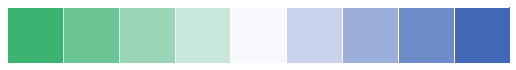

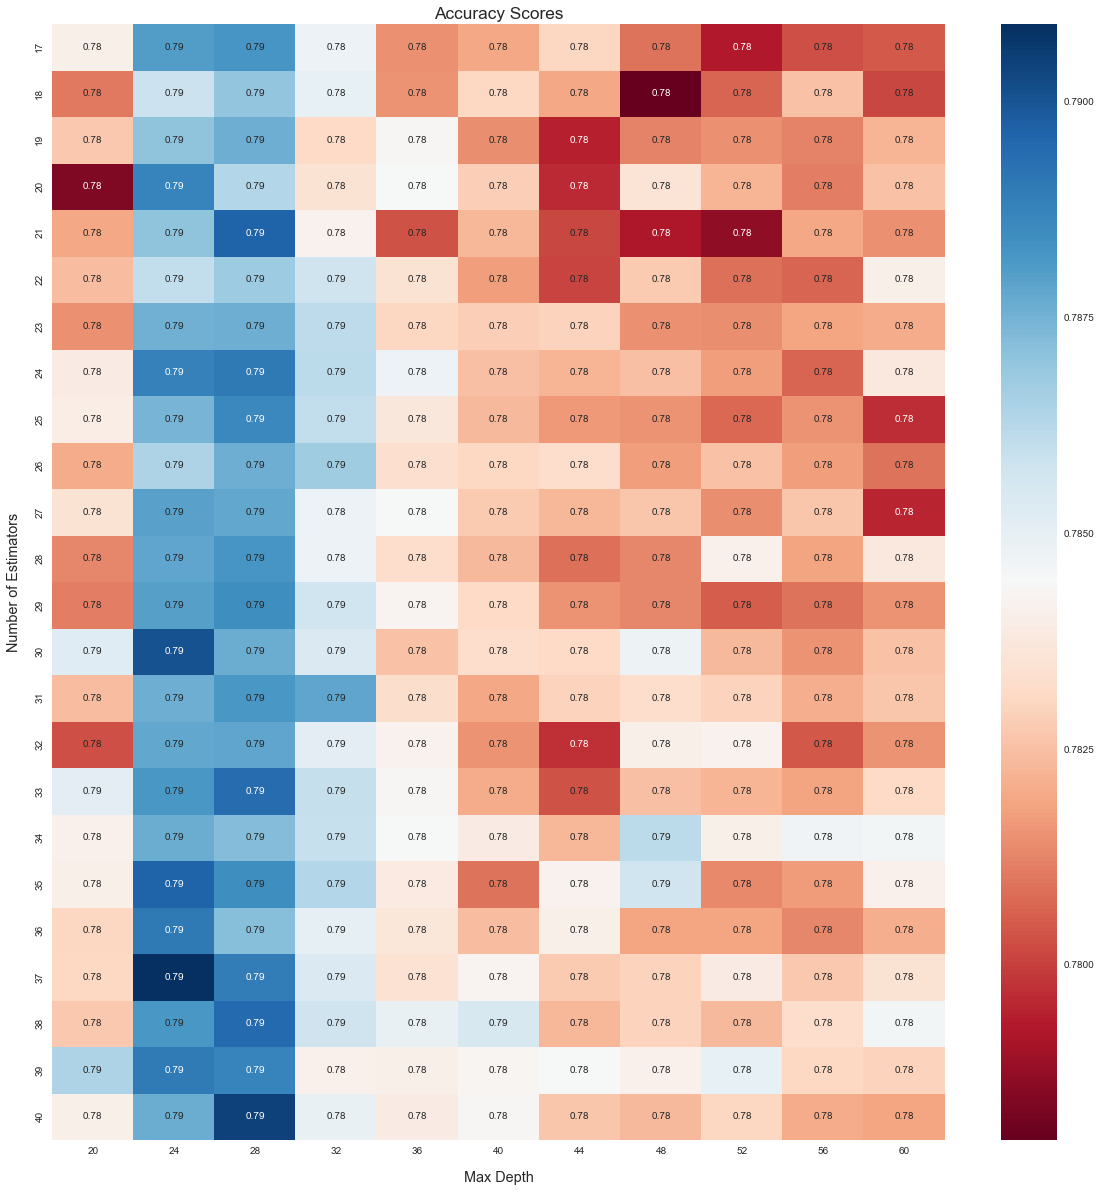

In [101]:
import seaborn as sns
import pylab as P
import matplotlib.pyplot as plt

sns.palplot(sns.blend_palette(["mediumseagreen", "ghostwhite", "#4168B7"], 9))

df_accuracy = df_accuracy[df_accuracy.columns].astype(float)

fig, ax = plt.subplots(figsize=(20,20))

#RdBu_r
ax = sns.heatmap(df_accuracy,xticklabels=True,\
                 yticklabels=True,annot=True, ax=ax, cmap="RdBu")
ax.set_title("Accuracy Scores", size='xx-large')
ax.set_xlabel('Max Depth', size='x-large', labelpad=15)
ax.set_ylabel('Number of Estimators', size='x-large',labelpad=15)

df_accuracy.to_csv('/Users/martinrasumoff/ds3_t.txt', sep='\t', index=False)


In [104]:
pred = df_accuracy

to_submit = []

print df_accuracy.index.values

for ind in range(len(df_accuracy.index)):

    for col in range(len(df_accuracy.columns)):
        
        print ind
        print col
        ids = df_accuracy.index[ind]
        print ids
        cols = df_accuracy.columns[col]
        print cols
        value = df_accuracy.ix[ids,cols]
        print value
        to_submit.append([ind,col,ids,cols,value])
    
df_submit = pd.DataFrame(to_submit)
df_submit.columns = ['y','x','day','hour','value']
print df_submit.head()
print df_submit.tail()

df_submit.to_csv('/Users/martinrasumoff/ds3_t2.txt', sep='\t', index=False)

[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
0
0
17
20
0.78404040404
0
1
17
24
0.788080808081
0
2
17
28
0.788282828283
0
3
17
32
0.784848484848
0
4
17
36
0.781481481481
0
5
17
40
0.781952861953
0
6
17
44
0.78303030303
0
7
17
48
0.780942760943
0
8
17
52
0.779259259259
0
9
17
56
0.780269360269
0
10
17
60
0.780471380471
1
0
18
20
0.78101010101
1
1
18
24
0.785858585859
1
2
18
28
0.787003367003
1
3
18
32
0.784983164983
1
4
18
36
0.781548821549
1
5
18
40
0.783097643098
1
6
18
44
0.781952861953
1
7
18
48
0.77797979798
1
8
18
52
0.780673400673
1
9
18
56
0.782558922559
1
10
18
60
0.780134680135
2
0
19
20
0.782693602694
2
1
19
24
0.787070707071
2
2
19
28
0.787609427609
2
3
19
32
0.783164983165
2
4
19
36
0.784377104377
2
5
19
40
0.781414141414
2
6
19
44
0.779393939394
2
7
19
48
0.781212121212
2
8
19
52
0.781481481481
2
9
19
56
0.781212121212
2
10
19
60
0.782222222222
3
0
20
20
0.778383838384
3
1
20
24
0.788754208754
3
2
20
28
0.78632996633
3
3
20
32
0.783501683502
3
4

In [59]:
print df_accuracy.shape
print df_precision.shape
print df_recall.shape
print df_fl.shape

(24, 16)
(24, 16)
(24, 16)
(24, 16)


In [60]:
print df_accuracy.head()

           5          6          7          8          9          10  \
17  0.7061279  0.7085522  0.7154209  0.7235017  0.7288215  0.7365657   
18  0.7125253  0.7156902  0.7167003  0.7232997  0.7241751  0.7335354   
19  0.7052525  0.7142088  0.7220202  0.7235017  0.7268013  0.7361616   
20  0.7104377  0.7159596   0.717037  0.7239057  0.7275421  0.7358249   
21  0.7140067  0.7154882  0.7220202  0.7251852  0.7252525  0.7354209   

           11         12         13         14         15         16  \
17   0.740404  0.7504377  0.7520539   0.759798  0.7620202   0.770303   
18   0.743771  0.7540741  0.7505051  0.7589899  0.7672727  0.7690236   
19  0.7420202  0.7457239  0.7521212  0.7604714  0.7659933  0.7662626   
20  0.7373064  0.7490236  0.7529293  0.7617508  0.7653199  0.7696296   
21  0.7388552  0.7495623  0.7517845  0.7597306  0.7643771  0.7698316   

           17         18         19         20  
17  0.7713805  0.7776431  0.7775758  0.7821549  
18  0.7705051  0.7763636  0.7793266 

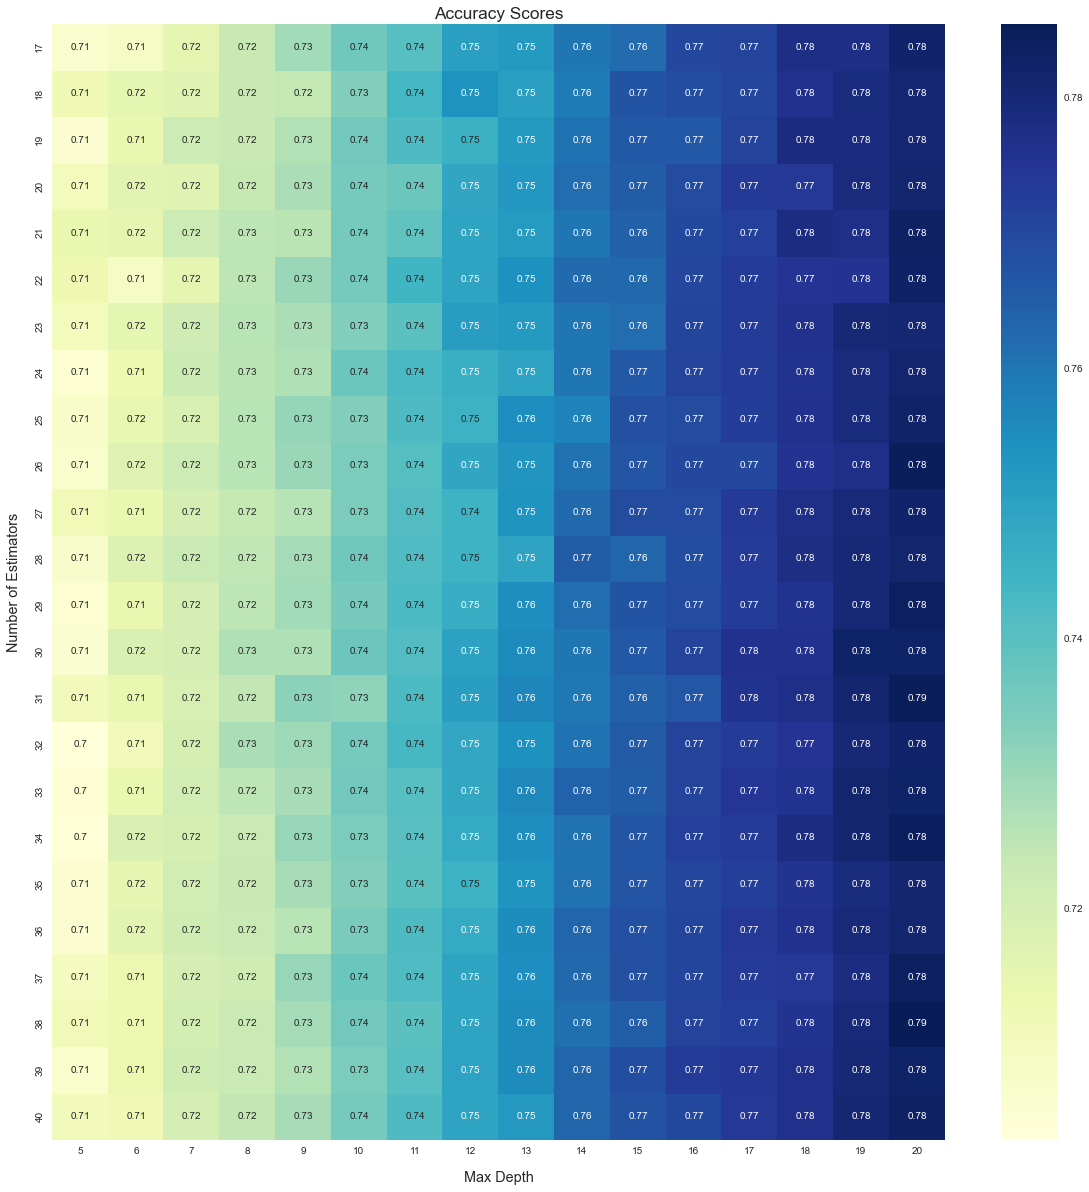

In [62]:
import seaborn as sns
import pylab as P
import matplotlib.pyplot as plt

df_accuracy = df_accuracy[df_accuracy.columns].astype(float)

fig, ax = plt.subplots(figsize=(20,20))

#RdBu_r
ax = sns.heatmap(df_accuracy, cmap="YlGnBu",xticklabels=True,\
                 yticklabels=True,annot=True, ax=ax)
ax.set_title("Accuracy Scores", size='xx-large')
ax.set_xlabel('Max Depth', size='x-large', labelpad=15)
ax.set_ylabel('Number of Estimators', size='x-large',labelpad=15)

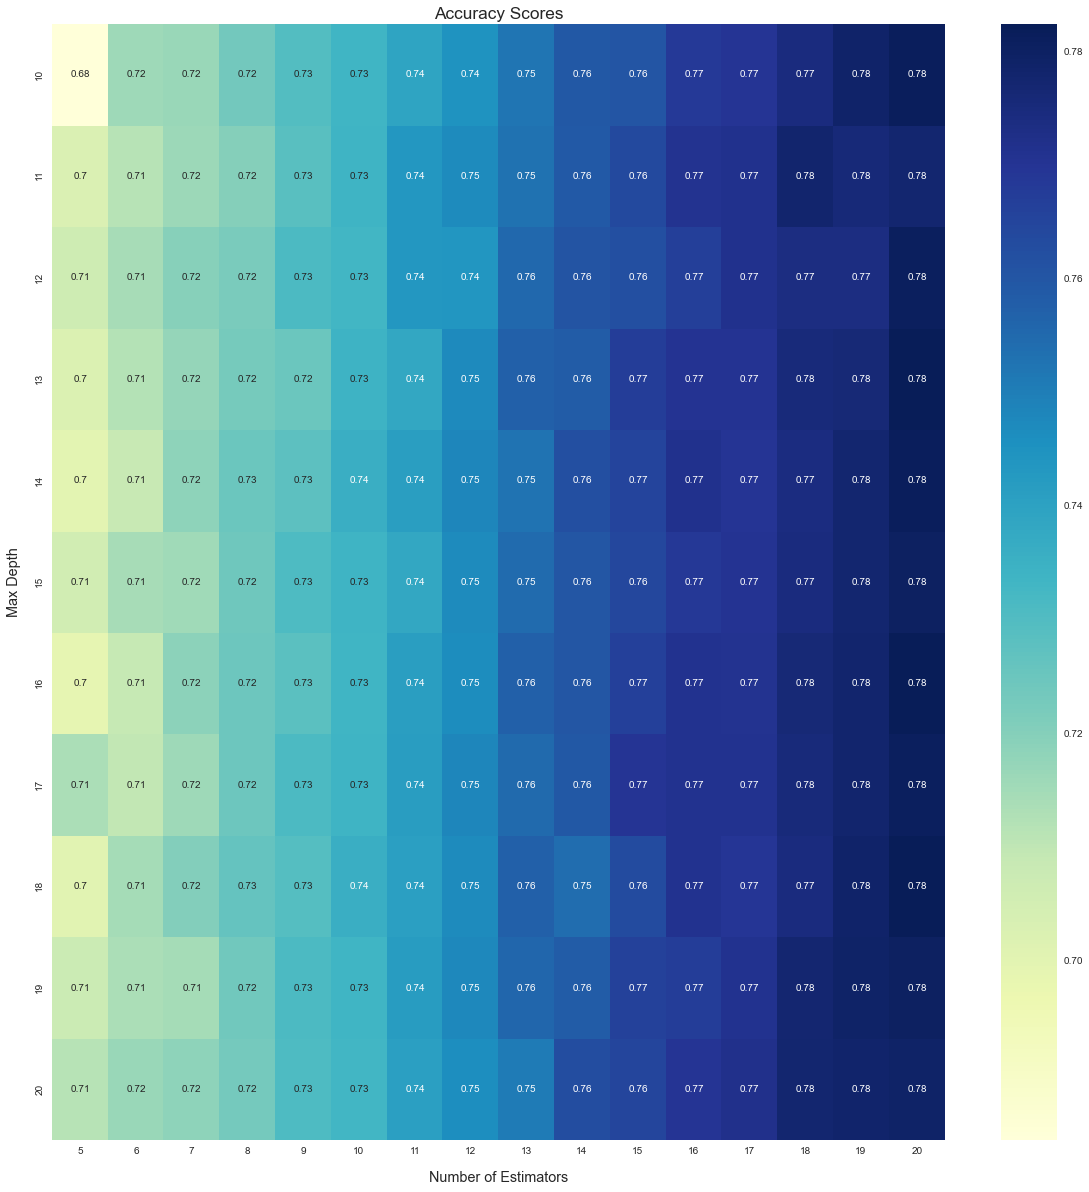

In [57]:
import seaborn as sns
import pylab as P
import matplotlib.pyplot as plt

df_accuracy = df_accuracy[df_accuracy.columns].astype(float)

fig, ax = plt.subplots(figsize=(20,20))

#RdBu_r
ax = sns.heatmap(df_accuracy, cmap="YlGnBu",xticklabels=True,\
                 yticklabels=True,annot=True, ax=ax)
ax.set_title("Accuracy Scores", size='xx-large')
ax.set_xlabel('Number of Estimators', size='x-large', labelpad=15)
ax.set_ylabel('Max Depth', size='x-large',labelpad=15)

In [ ]:
'''    P.figure()
    ax = sns.heatmap(x1, cmap="RdBu")
    xlabel = 'Depth = ',str(depth)
    ylabel = 'Nr Elem = ',str(elem)
    ax.set_xticklabels(labels=['Functional','Needs Repair','Non Functioning'],rotation=0)
    ax.set_yticklabels(labels=[10,11,12,13,14,15,16,17,18,19,20],rotation=0)
    title = 'Depth = ',str(depth),' - ',str(elem)
    ax.set_title(title)
    
    P.figure()
    ax2 = sns.heatmap(x2, cmap="RdBu")
    xlabel = 'Depth = ',str(depth)
    ylabel = 'Nr Elem = ',str(elem)
    ax2.set_xticklabels(labels=['Functional','Needs Repair','Non Functioning'],rotation=0)
    ax2.set_yticklabels(labels=[10,11,12,13,14,15,16,17,18,19,20],rotation=0)
    title = 'Depth = ',str(depth),' - ',str(elem)
    ax2.set_title(title)

    P.figure()
    ax3 = sns.heatmap(x3, cmap="RdBu")
    xlabel = 'Depth = ',str(depth)
    ylabel = 'Nr Elem = ',str(elem)
    ax3.set_xticklabels(labels=['Functional','Needs Repair','Non Functioning'],rotation=0)
    ax3.set_yticklabels(labels=[10,11,12,13,14,15,16,17,18,19,20],rotation=0)
    title = 'Depth = ',str(depth),' - ',str(elem)
    ax3.set_title(title)


    P.show()
    
    '''

0.827120931017
[ 0.82712093  0.32889481  0.76572856]
[10 11 12 13 14 15 16 17 18 19 20]
[array([ 0.82712093,  0.32889481,  0.76572856]), array([ 0.8260845 ,  0.32131148,  0.76761103]), array([ 0.82923536,  0.33244681,  0.76753334]), array([ 0.82615828,  0.32329843,  0.76646022]), array([ 0.82804693,  0.33066667,  0.76788293]), array([ 0.82799459,  0.32821881,  0.76836374]), array([ 0.82825094,  0.32296492,  0.76933384]), array([ 0.82783593,  0.34575835,  0.7681727 ]), array([ 0.82820426,  0.332893  ,  0.76713903]), array([ 0.82802476,  0.33156499,  0.76818269]), array([ 0.82886342,  0.32240803,  0.77206022])]
[array([ 0.82378096,  0.39047619,  0.78191926]), array([ 0.827089  ,  0.3822563 ,  0.78506209]), array([ 0.82840237,  0.38449111,  0.78899753]), array([ 0.82778565,  0.39035088,  0.78576656]), array([ 0.82807972,  0.39672131,  0.78514734]), array([ 0.82747188,  0.39477977,  0.78698387]), array([ 0.82682493,  0.39082969,  0.78616809]), array([ 0.82794739,  0.39372634,  0.78747285])

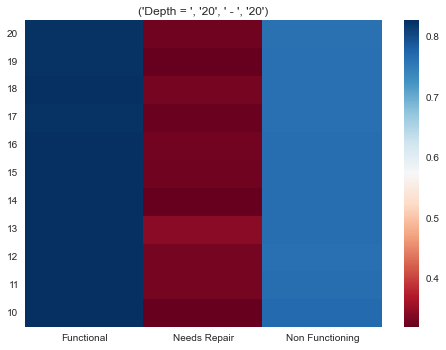

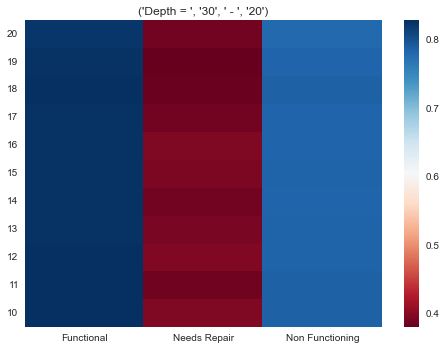

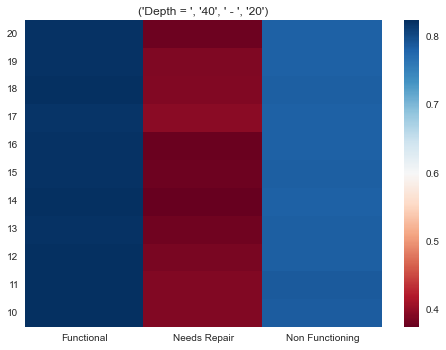

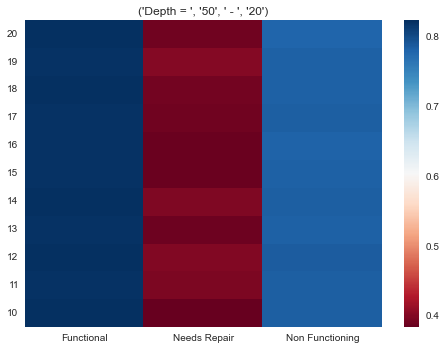

In [63]:
print df_accuracy[20][10][0]
print df_accuracy[20][10]
cols = df_accuracy.columns.values
rows = df_accuracy.index.values
print rows
for depth in cols:
    
    x1 = []
    
    for elem in rows:
        x1.append(df_accuracy[depth][elem])
       
    print x1
    
    P.figure()
    ax = sns.heatmap(x1, cmap="RdBu")
    xlabel = 'Depth = ',str(depth)
    ylabel = 'Nr Elem = ',str(elem)
    ax.set_xticklabels(labels=['Functional','Needs Repair','Non Functioning'],rotation=0)
    ax.set_yticklabels(labels=[10,11,12,13,14,15,16,17,18,19,20],rotation=0)
    title = 'Depth = ',str(depth),' - ',str(elem)
    ax.set_title(title)
    

In [31]:
import seaborn as sns
import pylab as P

    
P.figure()
ax = sns.heatmap(x1, cmap="RdBu")
ax.set_xticklabels(labels='Number of Estimators',rotation=45)
ax.set_yticklabels(labels='Maximum Depth',rotation=0)
P.show()

P.figure()
rsquared.hist()

print "hello"

KeyError: 10

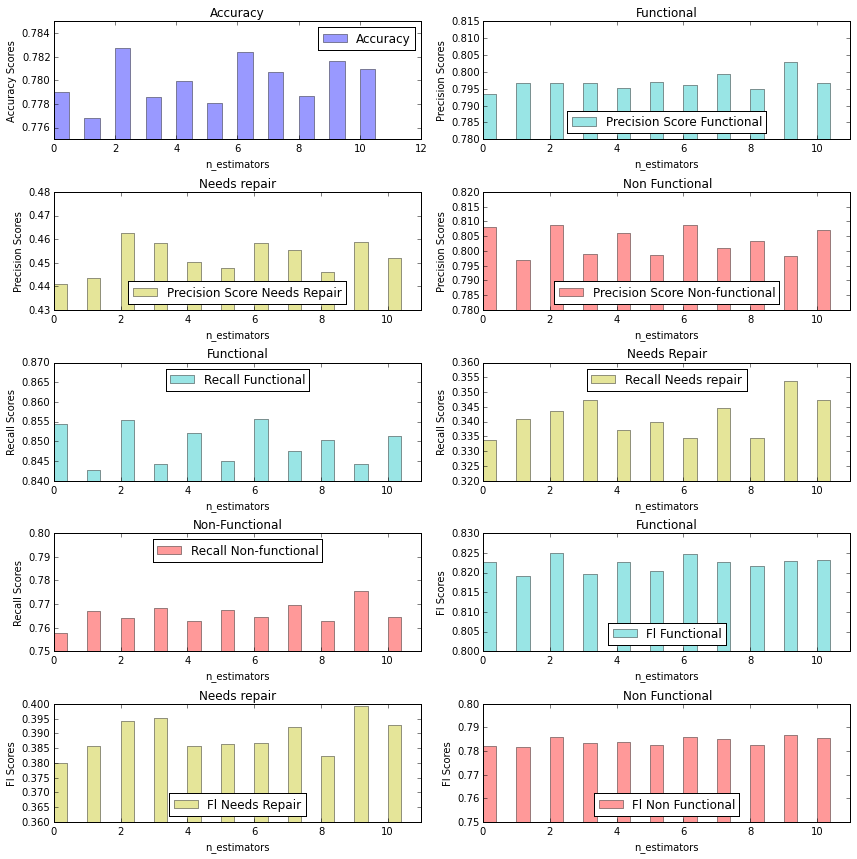

In [137]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10)) = plt.subplots(5,2,figsize=(12,12))

n_groups = 11
bar_width = 0.50
index = np.arange(n_groups)
opacity = 0.4

rects1 = ax1.bar(index, acc_score, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Accuracy')

ax1.set_ylim([0.775,0.785])
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('Accuracy Scores')

ax1.set_title('Accuracy')
ax1.legend()

n_groups = 11
bar_width = 0.40
index = np.arange(n_groups)
opacity = 0.4

x1 = []
x2 = []
x3 = []

for element in range(len(prec_score)):
    x1.append(prec_score[element][0])
    x2.append(prec_score[element][1])
    x3.append(prec_score[element][2])

rects1 = ax2.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Precision Score Functional')

rects2 = ax3.bar(index, x2, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Precision Score Needs Repair')

rects3 = ax4.bar(index, x3, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Precision Score Non-functional')

ax2.legend(loc=8)
ax2.set_ylim([0.78,0.815])
ax2.set_xlim([0,11])
ax2.set_xlabel('n_estimators')
ax2.set_ylabel('Precision Scores')
ax2.set_title('Functional')

ax3.legend(loc=8)
ax3.set_ylim([0.43,0.48])
ax3.set_xlim([0,11])
ax3.set_xlabel('n_estimators')
ax3.set_ylabel('Precision Scores')
ax3.set_title('Needs repair')

ax4.legend(loc=8)
ax4.set_ylim([0.78,0.82])
ax4.set_xlim([0,11])
ax4.set_xlabel('n_estimators')
ax4.set_ylabel('Precision Scores')
ax4.set_title('Non Functional')

n_groups = 11
bar_width = 0.40
index = np.arange(n_groups)
opacity = 0.4

x1 = []
x2 = []
x3 = []

for element in range(len(reca_score)):
    x1.append(reca_score[element][0])
    x2.append(reca_score[element][1])
    x3.append(reca_score[element][2])

rects1 = ax5.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Recall Functional')

rects2 = ax6.bar(index, x2, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Recall Needs repair')

rects3 = ax7.bar(index, x3, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Recall Non-functional')

ax5.legend(loc=9)
ax5.set_ylim([0.84,0.87])
ax5.set_xlim([0,11])
ax5.set_xlabel('n_estimators')
ax5.set_ylabel('Recall Scores')
ax5.set_title('Functional')

ax6.legend(loc=9)
ax6.set_ylim([0.32,0.36])
ax6.set_xlim([0,11])
ax6.set_xlabel('n_estimators')
ax6.set_ylabel('Recall Scores')
ax6.set_title('Needs Repair')

ax7.legend(loc=9)
ax7.set_ylim([0.75,0.80])
ax7.set_xlim([0,11])
ax7.set_xlabel('n_estimators')
ax7.set_ylabel('Recall Scores')
ax7.set_title('Non-Functional')

x1 = []
x2 = []
x3 = []

for element in range(len(fll_score)):
    x1.append(fll_score[element][0])
    x2.append(fll_score[element][1])
    x3.append(fll_score[element][2])

rects1 = ax8.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Fl Functional')

rects2 = ax9.bar(index, x2, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Fl Needs Repair')

rects3 = ax10.bar(index, x3, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Fl Non Functional')

ax8.legend(loc=8)
ax8.set_ylim([0.8,0.83])
ax8.set_xlim([0,11])
ax8.set_xlabel('n_estimators')
ax8.set_ylabel('Fl Scores')
ax8.set_title('Functional')

ax9.legend(loc=8)
ax9.set_ylim([0.36,0.40])
ax9.set_xlim([0,11])
ax9.set_xlabel('n_estimators')
ax9.set_ylabel('Fl Scores')
ax9.set_title('Needs repair')

ax10.legend(loc=8)
ax10.set_ylim([0.75,0.80])
ax10.set_xlim([0,11])
ax10.set_xlabel('n_estimators')
ax10.set_ylabel('Fl Scores')
ax10.set_title('Non Functional')


plt.tight_layout()
plt.show()




In [45]:
import numpy as np

'''
n_estimators increase start with 20, default is 10

'''
num_estimators = [10,11,12,13,14,15,16,17,18,19,20]
train_res = []
test_res
for estim in num_estimators:
    clf = ExtraTreesClassifier(num_estimators=estim)
    X_new_t = clf.fit_transform(X, y)
    result_train = clf.score(X,y)
    result_test = clf.score(X_pumps_test,y_pumps_test)
    print "Number of Estimators: ",estim
    print "Train Score:",result_train
    print "Test Score:",result_test
    

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]],X.columns.values[indices[f]]))

print "X_new_t",len(X_new_t)

print X_new_t.shape


(44550, 14)
Train Score: 0.995061728395
Test Score: 0.779057239057
Feature ranking:
1. feature 3 (0.154770) latitude
2. feature 2 (0.154396) longitude
3. feature 1 (0.080339) gps_height
4. feature 70 (0.075335) dry
5. feature 6 (0.054576) population
6. feature 71 (0.031172) enough
7. feature 5 (0.024468) district_code
8. feature 90 (0.021932) other
9. feature 38 (0.020333) other
10. feature 4 (0.019230) region_code
11. feature 48 (0.018980) other
12. feature 59 (0.017779) never pay
13. feature 72 (0.016599) insufficient
14. feature 0 (0.015377) amount_tsh
15. feature 25 (0.010126) VWC
16. feature 31 (0.009989) True
17. feature 30 (0.009214) False
18. feature 17 (0.008781) True
19. feature 69 (0.008713) unknown
20. feature 63 (0.007745) unknown
21. feature 86 (0.007675) communal standpipe
22. feature 66 (0.007240) good
23. feature 56 (0.007170) user-group
24. feature 16 (0.007167) False
25. feature 62 (0.007049) per bucket
26. feature 11 (0.006857) Lake Victoria
27. feature 73 (0.006853

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)


In [46]:
import matplotlib.pyplot as plt

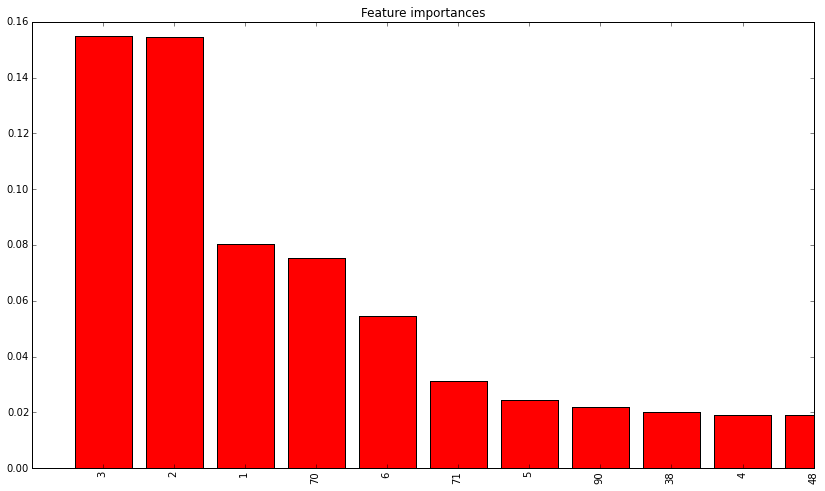

['amount_tsh' 'gps_height' 'longitude' 'latitude' 'region_code'
 'district_code' 'population' 'Internal' 'Lake Nyasa' 'Lake Rukwa'
 'Lake Tanganyika' 'Lake Victoria' 'Pangani' 'Rufiji'
 'Ruvuma / Southern Coast' 'Wami / Ruvu' 'False' 'True' 'Company' 'None'
 'Other' 'Parastatal' 'Private operator' 'SWC' 'Trust' 'VWC' 'WUA' 'WUG'
 'Water Board' 'Water authority' False True 'afridev' 'gravity'
 'india mark ii' 'india mark iii' 'mono' 'nira/tanira' 'other'
 'other handpump' 'other motorpump' 'rope pump' 'submersible' 'swn 80'
 'wind-powered' 'gravity' 'handpump' 'motorpump' 'other' 'rope pump'
 'submersible' 'wind-powered' 'commercial' 'other' 'parastatal' 'unknown'
 'user-group' 'annually' 'monthly' 'never pay' 'on failure' 'other'
 'per bucket' 'unknown' 'colored' 'fluoride' 'good' 'milky' 'salty'
 'unknown' 'dry' 'enough' 'insufficient' 'seasonal' 'unknown' 'borehole'
 'dam' 'other' 'rainwater harvesting' 'river/lake' 'shallow well' 'spring'
 'groundwater' 'surface' 'unknown' 'cattle t

In [47]:
# Plot the feature importances of the forest

plt.figure(figsize=(14,8))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), indices, rotation='vertical')
plt.xlim([-1, 10])
plt.show()

print X.columns.values
for a in range(len(X.columns.values)):
    print a," - ", X.columns.values[indices[a]]





In [54]:
test = pd.read_csv('/Users/martinrasumoff/Desktop/metis/mcnulty/Pumpitup/test.csv', index_col='id')
print test.head()

test = test[['id','amount_tsh','gps_height','longitude','latitude','region_code','district_code',\
            'population','basin','public_meeting','scheme_management','permit',\
            'extraction_type_group','extraction_type_class','management_group',\
            'payment_type','quality_group','quantity_group',\
            'source_type','source_class','waterpoint_type_group']]

print test.head()

       amount_tsh date_recorded                  funder  gps_height  \
id                                                                    
50785           0    2013-02-04                    Dmdd        1996   
51630           0    2013-02-04  Government Of Tanzania        1569   
17168           0    2013-02-01                     NaN        1567   
45559           0    2013-01-22              Finn Water         267   
49871         500    2013-03-27                  Bruder        1260   

        installer  longitude   latitude                 wpt_name  num_private  \
id                                                                              
50785        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
51630         DWE  36.656709  -3.309214                  Kimnyak            0   
17168         NaN  34.767863  -5.004344           Puma Secondary            0   
45559  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
49871      BRUDE

KeyError: "['id'] not in index"

In [55]:
tf_data_basin = pd.get_dummies(test['basin'])
print 'basin:',tf_data_basin.shape
tf_data_public_meeting = pd.get_dummies(test['public_meeting'])
print 'Public Meeting:',tf_data_public_meeting.shape
tf_data_scheme_mgmnt = pd.get_dummies(test['scheme_management'])
print 'Scheme Management:',tf_data_scheme_mgmnt.shape
tf_data_permit = pd.get_dummies(test['permit'])
print 'permit:',tf_data_permit.shape
tf_data_extraction_type_group = pd.get_dummies(test['extraction_type_group'])
print 'Data Extraction:',tf_data_extraction_type_group.shape
tf_data_extraction_type_class = pd.get_dummies(test['extraction_type_class'])
print 'Data Extr Type:',tf_data_extraction_type_class.shape
tf_data_management_group = pd.get_dummies(test['management_group'])
print 'Management Group:',tf_data_management_group.shape
tf_data_payment_type = pd.get_dummies(test['payment_type'])
print 'Payment Type:',tf_data_payment_type.shape
tf_data_quality_group = pd.get_dummies(test['quality_group'])
print 'Quality Group:',tf_data_quality_group.shape
tf_data_quantity_group = pd.get_dummies(test['quantity_group'])
print 'Quantity Group:',tf_data_quantity_group.shape
tf_data_source_type = pd.get_dummies(test['source_type'])
print 'Source Type:',tf_data_source_type.shape
tf_data_source_class = pd.get_dummies(test['source_class'])
print 'Source Class:',tf_data_source_class.shape
tf_data_waterpoint_type_group = pd.get_dummies(test['waterpoint_type_group'])
print 'Waterpoint Type:',tf_data_waterpoint_type_group.shape

basin: (14850, 9)
Public Meeting: (14850, 2)
Scheme Management: (14850, 11)
permit: (14850, 2)
Data Extraction: (14850, 13)
Data Extr Type: (14850, 7)
Management Group: (14850, 5)
Payment Type: (14850, 7)
Quality Group: (14850, 6)
Quantity Group: (14850, 5)
Source Type: (14850, 7)
Source Class: (14850, 3)
Waterpoint Type: (14850, 6)


In [56]:
tf_data = test[['amount_tsh','gps_height','longitude','latitude','region_code','district_code','population']]

tf_coded = pd.concat([tf_data,tf_data_basin,tf_data_public_meeting,tf_data_scheme_mgmnt,tf_data_permit,\
                      tf_data_extraction_type_group,tf_data_extraction_type_class,tf_data_management_group,\
                      tf_data_payment_type,tf_data_quality_group,tf_data_quantity_group,\
                      tf_data_source_type,tf_data_source_class,tf_data_waterpoint_type_group],axis=1)

print tf_data.shape
print tf_coded.shape
print type(tf_coded)

(14850, 7)
(14850, 90)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
'''1. feature 3 (0.154770) latitude
2. feature 2 (0.154396) longitude
3. feature 1 (0.080339) gps_height
4. feature 70 (0.075335) dry
5. feature 6 (0.054576) population
6. feature 71 (0.031172) enough
7. feature 5 (0.024468) district_code
8. feature 90 (0.021932) other
9. feature 38 (0.020333) other
10. feature 4 (0.019230) region_code
11. feature 48 (0.018980) other
12. feature 59 (0.017779) never pay
13. feature 72 (0.016599) insufficient
14. feature 0 (0.015377) amount_tsh'''

In [58]:
print tf_coded.tail()
print test.tail()

       amount_tsh  gps_height  longitude   latitude  region_code  \
id                                                                 
39307           0          34  38.852669  -6.582841            6   
18990        1000           0  37.451633  -5.350428            4   
28749           0        1476  34.739804  -4.585587           13   
33492           0         998  35.432732 -10.584159           10   
68707           0         481  34.765054 -11.226012           10   

       district_code  population  Internal  Lake Nyasa  Lake Rukwa  ...    \
id                                                                  ...     
39307              1          20         0           0           0  ...     
18990              7        2960         0           0           0  ...     
28749              2         200         1           0           0  ...     
33492              2         150         0           1           0  ...     
68707              3          40         0           1       

In [59]:
'''1. feature 3 (0.154770) latitude
2. feature 2 (0.154396) longitude
3. feature 1 (0.080339) gps_height
4. feature 70 (0.075335) dry
5. feature 6 (0.054576) population
6. feature 71 (0.031172) enough
7. feature 5 (0.024468) district_code
8. feature 90 (0.021932) other
9. feature 38 (0.020333) other
10. feature 4 (0.019230) region_code
11. feature 48 (0.018980) other
12. feature 59 (0.017779) never pay
13. feature 72 (0.016599) insufficient
14. feature 0 (0.015377) amount_tsh'''

tf_coded_2 = tf_coded[['latitude','longitude','gps_height','dry','population','enough','district_code',\
                       'region_code','never pay','insufficient']]

print tf_coded_2.head()
print tf_coded_2.tail()


        latitude  longitude  gps_height  dry  population  enough  \
id                                                                 
50785  -4.059696  35.290799        1996    0         321       0   
51630  -3.309214  36.656709        1569    0         300       0   
17168  -5.004344  34.767863        1567    0         500       0   
45559  -9.418672  38.058046         267    1         250       0   
49871 -10.950412  35.006123        1260    0          60       1   

       district_code  region_code  never pay  insufficient  
id                                                          
50785              3           21          1             0  
51630              2            2          1             1  
17168              2           13          1             1  
45559             43           80          0             0  
49871              3           10          0             0  
        latitude  longitude  gps_height  dry  population  enough  \
id                          

In [70]:
X_transformed = X_pumps_train[['latitude','longitude','gps_height','dry','population','enough','district_code',\
                       'region_code','never pay','insufficient']]

y = y_pumps_train[['label']]

clf_transformed = ExtraTreesClassifier()
X_fit_n = clf_transformed.fit(X_transformed, y)
result_transformed = clf_transformed.score(X_transformed,y)

print tf_coded_2.head()
print tf_coded_2.tail()
a = clf_transformed.predict(tf_coded_2)

print a


        latitude  longitude  gps_height  dry  population  enough  \
id                                                                 
50785  -4.059696  35.290799        1996    0         321       0   
51630  -3.309214  36.656709        1569    0         300       0   
17168  -5.004344  34.767863        1567    0         500       0   
45559  -9.418672  38.058046         267    1         250       0   
49871 -10.950412  35.006123        1260    0          60       1   

       district_code  region_code  never pay  insufficient  
id                                                          
50785              3           21          1             0  
51630              2            2          1             1  
17168              2           13          1             1  
45559             43           80          0             0  
49871              3           10          0             0  
        latitude  longitude  gps_height  dry  population  enough  \
id                          

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [71]:
print a

['functional' 'functional' 'functional' ..., 'functional' 'functional'
 'non functional']


In [74]:
pred = a

to_submit = []
print len(tf_coded_2)
for ind in range(len(tf_coded_2)):
    ids = tf_coded_2.index[ind]
    to_pred = pred[ind]
    #print ids,' - ',to_pred
    to_submit.append([ids,to_pred])
    
df_submit = pd.DataFrame(to_submit)
df_submit.columns = ['id','status_group']
print df_submit.head()
print df_submit.tail()

df_submit.to_csv('/Users/martinrasumoff/submission_7.csv', sep=',', index=False)


14850
      id    status_group
0  50785      functional
1  51630      functional
2  17168      functional
3  45559  non functional
4  49871      functional
          id    status_group
14845  39307  non functional
14846  18990      functional
14847  28749      functional
14848  33492      functional
14849  68707  non functional


In [75]:
print df_submit['status_group'].unique()

['functional' 'non functional' 'functional needs repair']
